In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [2]:
import pandas as pd
import os
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
os.chdir("C:/Users/lenovo/Desktop/jupyternotebook")
data = pd.ExcelFile("HW_Data_Set.xlsx")
from pandas import read_excel 
my_sheet = 'Sheet1' 
file_name = 'HW_Data_Set.xlsx' 
df = read_excel(file_name, sheet_name = my_sheet)


In [3]:
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ind_5,6167.0,-0.803146,23.624403,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_6,6167.0,-0.803470,23.624144,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_8,6167.0,48.388890,36.388526,0.000000,14.285714,50.000000,85.714286,100.000000
ind_9,6167.0,48.289282,36.478009,0.000000,14.285714,50.000000,85.714286,100.000000
ind_10,6167.0,0.099609,60.414625,-100.000000,-50.000000,0.000000,57.142857,100.000000
...,...,...,...,...,...,...,...,...
ind_426,6167.0,0.498188,0.228547,0.000000,0.323783,0.495192,0.675730,1.000000
ind_428,6167.0,0.490174,0.150483,0.083530,0.379894,0.487078,0.601508,0.868534
20_target,6167.0,-0.057102,14.834497,-15.780588,-15.350354,0.000000,15.385945,15.768767
50_target,6167.0,-2.906358,34.559778,-37.142889,-36.208094,-34.267756,35.879524,37.038694


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(3)
memory usage: 6.4+ MB


In [6]:
df.select_dtypes(include='object').columns

Index(['ind_109', 'ind_420', 'ind_422'], dtype='object')

In [7]:
df['ind_109'].unique()

array(['GREEN', 'RED'], dtype=object)

In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['ind_109']= label_encoder.fit_transform(df['ind_109']) 
print(df['ind_109'])

0       0
1       0
2       0
3       0
4       0
       ..
6162    1
6163    1
6164    0
6165    0
6166    0
Name: ind_109, Length: 6167, dtype: int32


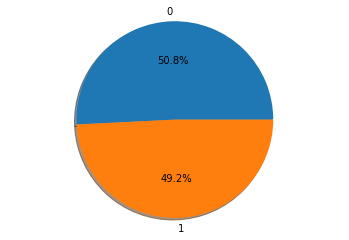

In [9]:
labels = df['ind_109'].astype('category').cat.categories.tolist()
counts = df['ind_109'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) 
ax1.axis('equal')
plt.show()

In [10]:
print(df['ind_420'].value_counts())

?       1041
28        37
45        35
39        33
29        33
        ... 
-327       1
-330       1
-349       1
297        1
-346       1
Name: ind_420, Length: 582, dtype: int64


In [11]:
print(df['ind_420'].value_counts().count())

582


In [12]:
print(df['ind_422'].value_counts())

?       1041
-211      33
-125      31
-200      30
-130      28
        ... 
-500       1
-496       1
-484       1
-482       1
-509       1
Name: ind_422, Length: 573, dtype: int64


In [13]:
print(df['ind_422'].value_counts().count())

573


In [14]:
df = df.replace('?',np.NaN)

In [15]:
df.isnull().sum().sort_values(ascending=False)

ind_422      1041
ind_420      1041
90_target       0
ind_50          0
ind_61          0
             ... 
ind_309         0
ind_310         0
ind_311         0
ind_313         0
ind_5           0
Length: 136, dtype: int64

In [16]:
df.isnull().values.any()

True

In [17]:
df['ind_420'].dropna()

0      -152.0
1      -158.0
2      -160.0
3      -166.0
4      -186.0
        ...  
6162    -11.0
6163    -12.0
6164    -21.0
6165    -33.0
6166    -28.0
Name: ind_420, Length: 5126, dtype: float64

In [18]:
df['ind_422'].dropna()

0      -353.0
1      -359.0
2      -362.0
3      -367.0
4      -388.0
        ...  
6162   -270.0
6163   -271.0
6164   -280.0
6165   -292.0
6166   -288.0
Name: ind_422, Length: 5126, dtype: float64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(90), int64(46)
memory usage: 6.4 MB


In [20]:
dfnan=df.copy()

In [21]:
dfnumeric=dfnan.select_dtypes(include=['float64','int64'])
dfnumeric.describe().T

,count,mean,std,min,25%,50%,75%,max
ind_5,6167.0,-0.803146,23.624403,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_6,6167.0,-0.803470,23.624144,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_8,6167.0,48.388890,36.388526,0.000000,14.285714,50.000000,85.714286,100.000000
ind_9,6167.0,48.289282,36.478009,0.000000,14.285714,50.000000,85.714286,100.000000
ind_10,6167.0,0.099609,60.414625,-100.000000,-50.000000,0.000000,57.142857,100.000000
...,...,...,...,...,...,...,...,...
ind_426,6167.0,0.498188,0.228547,0.000000,0.323783,0.495192,0.675730,1.000000
ind_428,6167.0,0.490174,0.150483,0.083530,0.379894,0.487078,0.601508,0.868534
20_target,6167.0,-0.057102,14.834497,-15.780588,-15.350354,0.000000,15.385945,15.768767
50_target,6167.0,-2.906358,34.559778,-37.142889,-36.208094,-34.267756,35.879524,37.038694


In [22]:
#numeric gibi görünüp categorc olabilcek değişkenlere baktık ama data hakkında bilgimiz yok
i=0
for i in dfnumeric.columns:
    deger=df[i].value_counts().count()
    print(i)
    print(deger)


ind_5
162
ind_6
162
ind_8
15
ind_9
15
ind_10
29
ind_12
6099
ind_13
6099
ind_14
637
ind_15
1172
ind_16
1821
ind_17
2301
ind_18
3057
ind_19
83
ind_20
141
ind_21
84
ind_22
192
ind_23
177
ind_25
5708
ind_26
5797
ind_27
2908
ind_28
7
ind_29
5840
ind_30
6158
ind_31
6166
ind_32
6167
ind_33
6167
ind_34
6167
ind_35
6167
ind_36
6167
ind_37
6167
ind_39
5931
ind_40
6
ind_41
6167
ind_42
71
ind_43
94
ind_44
109
ind_45
126
ind_46
135
ind_47
159
ind_48
175
ind_49
189
ind_50
258
ind_51
323
ind_52
90
ind_53
131
ind_56
102
ind_58
50
ind_61
38
ind_62
64
ind_65
55
ind_67
22
ind_70
18
ind_71
46
ind_74
42
ind_77
37
ind_82
6
ind_83
25
ind_88
2001
ind_92
6166
ind_102
6167
ind_109
2
ind_116
131
ind_118
5102
ind_122
52
ind_124
128
ind_128
201
ind_130
305
ind_132
390
ind_134
93
ind_136
91
ind_139
6167
ind_142
3614
ind_145
6142
ind_147
6167
ind_150
6166
ind_153
6165
ind_156
6166
ind_164
6114
ind_168
6167
ind_172
6167
ind_176
6167
ind_179
2140
ind_181
2166
ind_188
5191
ind_194
5724
ind_212
4441
ind_217
6
ind_225
50

In [23]:
from scipy.stats import shapiro
from scipy import stats
for i in dfnumeric:
    stat,p=shapiro(dfnumeric[i])
    alpha=0.05
    if(p>alpha):
        print(i,"Dagılımı Normalden Gelmektedir.h0 accepted")
    else:
        print(i,"Dagılımı Normalden Gelmemektedir.h0 reject")

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ind_5 Dagılımı Normalden Gelmemektedir.h0 reject
ind_6 Dagılımı Normalden Gelmemektedir.h0 reject
ind_8 Dagılımı Normalden Gelmemektedir.h0 reject
ind_9 Dagılımı Normalden Gelmemektedir.h0 reject
ind_10 Dagılımı Normalden Gelmemektedir.h0 reject
ind_12 Dagılımı Normalden Gelmemektedir.h0 reject
ind_13 Dagılımı Normalden Gelmemektedir.h0 reject
ind_14 Dagılımı Normalden Gelmemektedir.h0 reject
ind_15 Dagılımı Normalden Gelmemektedir.h0 reject
ind_16 Dagılımı Normalden Gelmemektedir.h0 reject
ind_17 Dagılımı Normalden Gelmemektedir.h0 reject
ind_18 Dagılımı Normalden Gelmemektedir.h0 reject
ind_19 Dagılımı Normalden Gelmemektedir.h0 reject
ind_20 Dagılımı Normalden Gelmemektedir.h0 reject
ind_21 Dagılımı Normalden Gelmemektedir.h0 reject
ind_22 Dagılımı Normalden Gelmemektedir.h0 reject
ind_23 Dagılımı Normalden Gelmemektedir.h0 reject
ind_25 Dagılımı Normalden Gelmemektedir.h0 reject
ind_26 Dagılımı Normalden Gelmemektedir.h0 reject
ind_27 Dagılımı Normalden Gelmemektedir.h0 reject
ind_

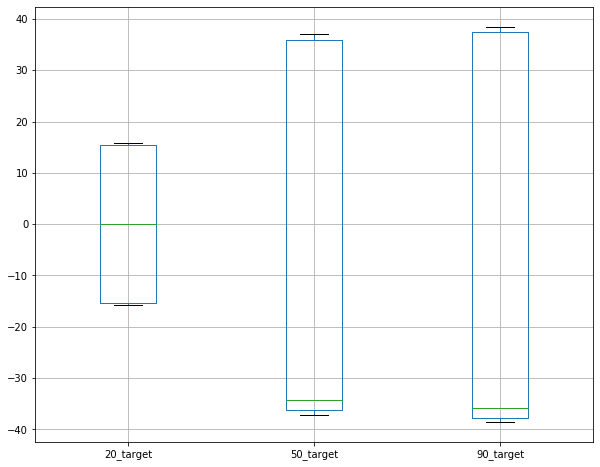

In [24]:
plt.figure(figsize=(10,8))
boxplot_df = df[["20_target", "50_target","90_target"]]
boxplot_df.boxplot()
plt.show()


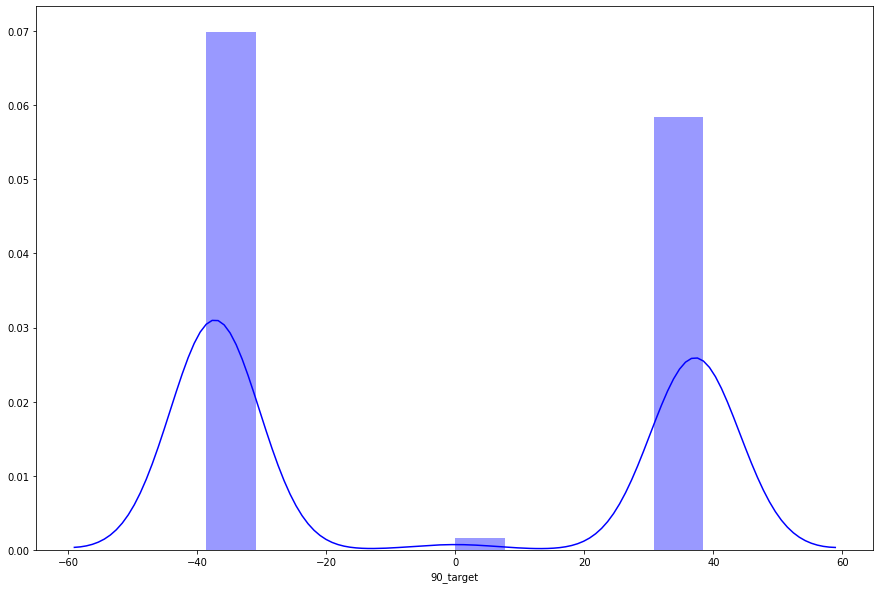

In [25]:
plt.figure(figsize=(15,10))
sns.distplot(df["90_target"], hist=True, color="b")

In [26]:
dfnew=df.copy()

In [27]:
del dfnew['20_target']
del dfnew['50_target']
del dfnew['90_target']
del dfnew['ind_422']
del dfnew['ind_420']
del dfnew['ind_109']
corr = dfnew.corr()

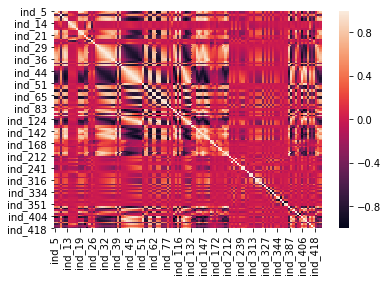

In [28]:
sns.heatmap(corr)

In [29]:
#datadan aralarında korelasyonları 0.90 üzeri olan columnları çıkardık features için
corr_matrix = dfnew.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

In [30]:
X= dfnew.drop(dfnew[to_drop], axis=1)
X

,ind_5,ind_8,ind_9,ind_10,ind_12,ind_14,ind_15,ind_16,ind_18,ind_22,...,ind_349,ind_352,ind_397,ind_399,ind_403,ind_412,ind_416,ind_424,ind_426,ind_428
0,19,100.000000,85.714286,14.285714,72.363515,23.80,17.62,11.73,9.1100,1,...,0.0,0.0,-26.386973,-0.003323,0.045130,0.002371,-49.6,1.000000,0.498547,0.701906
1,24,100.000000,78.571429,21.428571,74.275883,11.45,18.16,12.22,9.2225,1,...,0.0,0.0,-26.085949,-0.000476,0.035314,0.003074,-55.6,1.000000,0.537088,0.690833
2,30,100.000000,71.428571,28.571429,75.140402,8.75,17.86,12.28,9.3125,-1,...,0.0,0.0,-23.250410,-0.000309,0.005860,0.003561,-58.4,1.000000,0.615169,0.693040
3,37,100.000000,64.285714,35.714286,76.677846,7.80,14.76,12.61,9.4150,0,...,0.0,0.0,-19.499975,0.001137,-0.018252,0.004366,-61.8,1.000000,0.661517,0.673418
4,41,100.000000,57.142857,42.857143,81.603007,14.90,11.92,14.25,9.8925,10,...,0.0,0.0,-25.348270,0.001552,-0.007183,0.004198,-79.8,1.000000,0.747204,0.700522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,27,57.142857,28.571429,28.571429,60.010531,9.70,9.38,13.66,16.2175,-19,...,0.0,0.0,3.500000,0.003911,-0.006418,0.004633,-28.2,0.270270,0.840000,0.600846
6163,22,50.000000,21.428571,28.571429,60.209998,7.65,8.84,11.79,16.1175,-19,...,0.0,0.0,-2.250000,0.002819,-0.009019,0.008511,-28.6,0.000000,0.737470,0.527673
6164,19,42.857143,14.285714,28.571429,64.329611,8.95,9.06,10.30,16.3125,-13,...,0.0,0.0,-4.500000,0.001559,-0.004306,0.008848,-37.2,0.769231,0.632107,0.551759
6165,19,100.000000,7.142857,92.857143,69.027764,13.55,10.36,10.55,16.4200,-5,...,0.0,0.0,-5.850000,-0.000038,0.012664,0.008940,-48.9,1.000000,0.733010,0.591584


In [31]:
y=dfnan['90_target']

In [32]:
##target ve tüm değişkenler arasında korelasyon sıralaması
corr1 = pd.concat([y, dfnew], axis=1, keys=['y', 'dfnew']).corr().loc['dfnew', 'y']
c1 = corr1.abs().unstack()
c1.sort_values(ascending = False)

90_target  ind_18     0.140877
           ind_17     0.129277
           ind_412    0.124265
           ind_332    0.115002
           ind_16     0.108077
                        ...   
           ind_168    0.001107
           ind_404    0.001059
           ind_403    0.001059
           ind_88     0.000599
           ind_188    0.000393
Length: 130, dtype: float64

In [33]:
##target ve tüm değişkenler değişkenler arasında korelansyonu en yüksek olanlar
c1.sort_values(ascending=True, inplace=True)
columns_above_1 = [(col1, col2) for col1, col2 in c1.index if c1[col1,col2] > 0.1 and col1 != col2]

In [34]:
columns_above_1

[('90_target', 'ind_324'),
 ('90_target', 'ind_16'),
 ('90_target', 'ind_332'),
 ('90_target', 'ind_412'),
 ('90_target', 'ind_17'),
 ('90_target', 'ind_18')]

In [35]:
##target ve seçtiğimiz features arasında korelansyonu sıralaması
corr2 = pd.concat([y, X], axis=1, keys=['y', 'X']).corr().loc['X', 'y']
c2 = corr2.abs().unstack()
c2.sort_values(ascending = False)

90_target  ind_18     0.140877
           ind_412    0.124265
           ind_332    0.115002
           ind_16     0.108077
           ind_324    0.103707
                        ...   
           ind_28     0.001241
           ind_168    0.001107
           ind_403    0.001059
           ind_88     0.000599
           ind_188    0.000393
Length: 73, dtype: float64

In [36]:
##target ve features arasında korelansyonu en yüksek olanlar
c2.sort_values(ascending=True, inplace=True)
columns_above_2 = [(col1, col2) for col1, col2 in c1.index if c1[col1,col2] > 0.1 and col1 != col2]

In [37]:
columns_above_2

[('90_target', 'ind_324'),
 ('90_target', 'ind_16'),
 ('90_target', 'ind_332'),
 ('90_target', 'ind_412'),
 ('90_target', 'ind_17'),
 ('90_target', 'ind_18')]

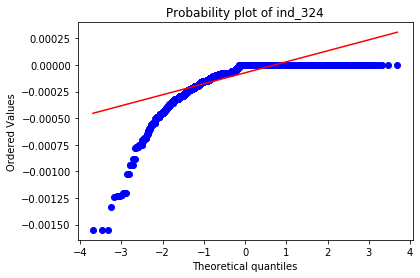

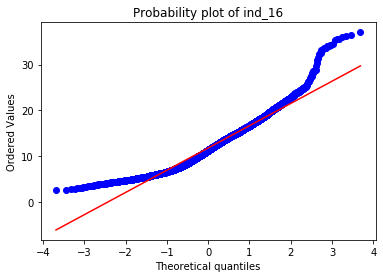

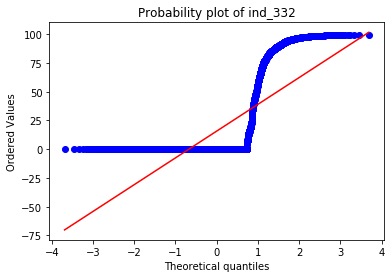

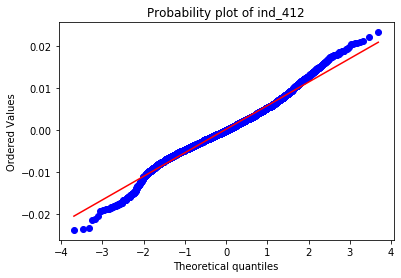

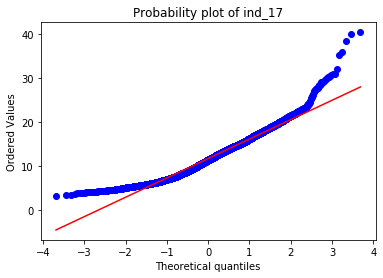

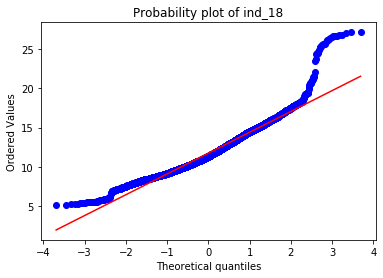

In [38]:
from matplotlib import pylab
from pylab import *
col =dfnan[["ind_324", "ind_16", "ind_332", "ind_412", "ind_17","ind_18"]]
for i in col:
        stats.probplot(dfnan[i], dist="norm",plot=pylab)
        pylab.title("Probability plot of " + i)
        pylab.show()

# LinearRegression

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, 
                                                    random_state=42, 
                                                    shuffle=False)


In [312]:
from sklearn.linear_model import LinearRegression
regresyon = LinearRegression()

In [313]:
regresyon.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [314]:
regresyon.coef_  ##her bir features için m değeri

array([ 8.92514760e-01, -3.16158213e+08,  3.16158213e+08,  3.16158213e+08,
       -3.36565572e-02, -3.79667442e-02, -2.50945129e-01,  1.14465983e+00,
        1.16012744e+00, -5.42573243e-01, -4.29989211e-01, -1.74786712e+06,
       -1.74494424e+06,  3.49076991e+06,  5.10492921e-03, -3.93798947e-02,
       -3.20917368e-03,  4.89568710e-02,  6.65886998e-02, -2.09137243e+00,
        3.71595910e-02,  1.65449634e-01,  1.04637101e-01, -2.13080343e-01,
        9.59569644e-02,  9.61149727e-01, -2.15843976e-01,  2.63171105e-01,
        9.77274108e+00,  3.97453234e-02,  1.59499616e+03, -7.79042166e-01,
       -1.18164886e-02,  1.49712913e-01, -7.16864619e-01,  3.95248553e-01,
       -1.52055919e-02,  3.03581953e-02,  2.35880574e-01, -2.55319602e-01,
        3.21490318e-02, -3.39059010e-02,  1.50536805e+00,  5.27180365e+01,
       -1.93203118e+01,  1.51182994e-01,  4.08105884e+04,  4.57353778e-02,
        2.25427364e+04, -3.56852621e+00, -2.11474076e-02, -9.24400015e-01,
        2.26689875e-02,  

In [315]:
regresyon.intercept_  #b

-2.4795700980476703

In [316]:
regresyon.score(X,y) 

0.0499772334733074

In [317]:
regresyon.predict(X)[0:10] 
#ilk 10 model için prediction gercekleştir modelin içine kendi xlerimi koyarak yleri bul tahmin edilmiş y değerleri

array([ -5.1137996 ,  -3.01333963,  -8.80379035,  -5.35270785,
       -11.57283117, -11.93729144,  -6.32513307, -13.88423374,
       -10.26058799, -14.96994105])

In [318]:
##modelin sonuçları 
from sklearn.metrics import mean_squared_error, r2_score
lm = smf.ols("y ~ X", dfnan)
model = lm.fit()
model.summary()
mse = mean_squared_error(y, model.fittedvalues)

In [319]:
mse ##tahmin hatası

1223.5526798000813

In [320]:
import numpy as np
rmse = np.sqrt(mse)
rmse

34.97931788643228

In [321]:
k_t= pd.DataFrame({"gercek_y": y[0:10], "tahmin_y": regresyon.predict(X)[0:10]})
k_t

,gercek_y,tahmin_y
0,36.997753,-5.113800
1,37.016198,-3.013340
2,-37.024805,-8.803790
3,-37.040483,-5.352708
4,-37.103503,-11.572831
5,-37.098277,-11.937291
6,-37.096740,-6.325133
7,-37.088440,-13.884234
8,-37.069073,-10.260588
9,-37.074913,-14.969941


In [322]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"] ## gercek y ve tahmin y arasındaki hata
k_t

,gercek_y,tahmin_y,hata
0,36.997753,-5.113800,42.111552
1,37.016198,-3.013340,40.029537
2,-37.024805,-8.803790,-28.221015
3,-37.040483,-5.352708,-31.687775
4,-37.103503,-11.572831,-25.530672
5,-37.098277,-11.937291,-25.160985
6,-37.096740,-6.325133,-30.771607
7,-37.088440,-13.884234,-23.204206
8,-37.069073,-10.260588,-26.808485
9,-37.074913,-14.969941,-22.104972


In [323]:
k_t["hata_kare"] = k_t["hata"]**2 
##hataların kareleri (pozitif etkisini görmek için yapıyoruz) her bir noktayı tahmin eder
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,36.997753,-5.113800,42.111552,1773.382840
1,37.016198,-3.013340,40.029537,1602.363843
2,-37.024805,-8.803790,-28.221015,796.425672
3,-37.040483,-5.352708,-31.687775,1004.115102
4,-37.103503,-11.572831,-25.530672,651.815192
5,-37.098277,-11.937291,-25.160985,633.075181
6,-37.096740,-6.325133,-30.771607,946.891773
7,-37.088440,-13.884234,-23.204206,538.435166
8,-37.069073,-10.260588,-26.808485,718.694843
9,-37.074913,-14.969941,-22.104972,488.629801


In [324]:
np.sum(k_t["hata_kare"])

9153.829414226691

In [325]:
np.mean(k_t["hata_kare"])

915.3829414226693

In [326]:
rmse

34.97931788643228

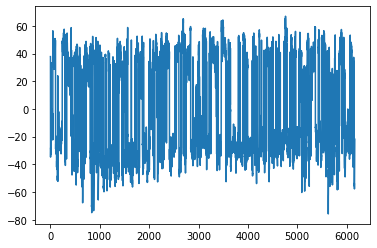

In [327]:
plt.plot(model.resid)

In [328]:
from sklearn.metrics import r2_score
y_pred=regresyon.predict(X_test)
score = r2_score(y_test,y_pred)

In [329]:
score

-0.3200495374476868

In [330]:
model.predict(X)[0:10]

0   -0.822013
1   -0.029700
2   -3.274821
3   -2.279861
4   -5.619448
5   -9.086733
6   -7.810608
7   -7.976463
8   -4.137722
9   -7.079058
dtype: float64

In [331]:
modelstat = lm.fit()
modelstat.summary()
modelstat.fittedvalues[0:5]

0   -0.822013
1   -0.029700
2   -3.274821
3   -2.279861
4   -5.619448
dtype: float64

In [332]:
model.fittedvalues[0:5]  ##fitted y

0   -0.822013
1   -0.029700
2   -3.274821
3   -2.279861
4   -5.619448
dtype: float64

In [333]:
y[0:5] ##gercek y

0    36.997753
1    37.016198
2   -37.024805
3   -37.040483
4   -37.103503
Name: 90_target, dtype: float64

In [334]:
regresyon.score(X,y)

0.0499772334733074

In [335]:
import statsmodels.api as sm
lm = sm.OLS(y, X)
model = lm.fit()  
##lm diye fonksiyon yaratıp fit ile model kurulumunu gerçekleştirdik
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              90_target   R-squared (uncentered):                   0.106
Model:                            OLS   Adj. R-squared (uncentered):              0.095
Method:                 Least Squares   F-statistic:                              9.860
Date:                Thu, 20 Aug 2020   Prob (F-statistic):                   4.31e-100
Time:                        16:15:28   Log-Likelihood:                         -30673.
No. Observations:                6167   AIC:                                  6.149e+04
Df Residuals:                    6094   BIC:                                  6.198e+04
Df Model:                          73                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_5          0.8541      0.287      2.974      0.003       0.291       1.417
ind_8      -2.999e+08   1.28e+08     -2.342      0.019   -5.51e+08   -4.89e+07
ind_9       2.999e+08   1.28e+08      2.342      0.019    4.89e+07    5.51e+08
ind_10      2.999e+08   1.28e+08      2.342      0.019    4.89e+07    5.51e+08
ind_12        -0.1093      0.208     -0.525      0.600      -0.517       0.299
ind_14         0.0219      0.150      0.147      0.883      -0.271       0.315
ind_15        -0.1611      0.229     -0.703      0.482      -0.611       0.288
ind_16         0.8227      0.249      3.300      0.001       0.334       1.312
ind_18         1.5651      0.234      6.680      0.000       1.106       2.024
ind_22        -0.3545      0.197     -1.801      0.072      -0.740       0.031
ind_23        -0.3519      0.198     -1.775      0.076      -0.741       0.037
ind_25     -7.237e+05   9.74e+05     -0.743      0.457   -2.63e+06    1.18e+06
ind_26     -7.222e+05   9.74e+05     -0.742      0.458   -2.63e+06    1.19e+06
ind_27      1.444e+06   1.95e+06      0.741      0.458   -2.37e+06    5.26e+06
ind_28         0.0001      0.011      0.013      0.989      -0.021       0.021
ind_29        -0.0226      0.016     -1.408      0.159      -0.054       0.009
ind_30        -0.0072      0.014     -0.504      0.614      -0.035       0.021
ind_36         0.0407      0.010      4.025      0.000       0.021       0.060
ind_39         0.0023      0.044      0.052      0.959      -0.084       0.089
ind_40        -1.8603      0.874     -2.128      0.033      -3.574      -0.147
ind_42         0.1987      0.289      0.688      0.491      -0.367       0.765
ind_43         0.2743      0.227      1.207      0.227      -0.171       0.720
ind_44         0.0747      0.179      0.418      0.676      -0.276       0.425
ind_52        -0.3920      0.285     -1.377      0.168      -0.950       0.166
ind_56         0.0899      0.100      0.896      0.370      -0.107       0.287
ind_58         1.2634      1.079      1.170      0.242      -0.853       3.379
ind_62        -0.2983      0.083     -3.601      0.000      -0.461      -0.136
ind_71         0.1900      0.076      2.510      0.012       0.042       0.338
ind_82         6.9857      0.990      7.057      0.000       5.045       8.926
ind_83         0.1237      0.065      1.905      0.057      -0.004       0.251
ind_88       373.6745   1126.073      0.332      0.740   -1833.826    2581.175
ind_116       -0.6542      0.342     -1.912      0.056      -1.325       0.016
ind_134        0.0415      0.129      0.321      0.748      -0.212       0.295
ind_147        0.1215      0.164      0.742      0.458      -0.200       0.443
ind_164       -0.4541      0.169     -2.686      0.007      -

In [336]:
import statsmodels.api as sm
lm = sm.OLS(y_train, X_train)
model_train = lm.fit()  
##lm diye fonksiyon yaratıp fit ile model kurulumunu gerçekleştirdik
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              90_target   R-squared (uncentered):                   0.145
Model:                            OLS   Adj. R-squared (uncentered):              0.132
Method:                 Least Squares   F-statistic:                              11.30
Date:                Thu, 20 Aug 2020   Prob (F-statistic):                   2.49e-116
Time:                        16:15:29   Log-Likelihood:                         -24460.
No. Observations:                4933   AIC:                                  4.907e+04
Df Residuals:                    4860   BIC:                                  4.954e+04
Df Model:                          73                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_5          0.9061      0.329      2.755      0.006       0.261       1.551
ind_8      -3.161e+08   1.41e+08     -2.243      0.025   -5.92e+08   -3.98e+07
ind_9       3.161e+08   1.41e+08      2.243      0.025    3.98e+07    5.92e+08
ind_10      3.161e+08   1.41e+08      2.243      0.025    3.98e+07    5.92e+08
ind_12        -0.0693      0.236     -0.294      0.769      -0.532       0.393
ind_14        -0.0383      0.170     -0.225      0.822      -0.372       0.296
ind_15        -0.2505      0.261     -0.959      0.337      -0.762       0.261
ind_16         1.1444      0.284      4.030      0.000       0.588       1.701
ind_18         1.1501      0.276      4.160      0.000       0.608       1.692
ind_22        -0.5517      0.223     -2.472      0.013      -0.989      -0.114
ind_23        -0.4399      0.225     -1.955      0.051      -0.881       0.001
ind_25     -1.747e+06   1.07e+06     -1.630      0.103   -3.85e+06    3.55e+05
ind_26     -1.744e+06   1.07e+06     -1.627      0.104   -3.85e+06    3.58e+05
ind_27      3.488e+06   2.14e+06      1.627      0.104   -7.14e+05    7.69e+06
ind_28         0.0051      0.012      0.427      0.669      -0.018       0.029
ind_29        -0.0393      0.018     -2.203      0.028      -0.074      -0.004
ind_30        -0.0024      0.016     -0.154      0.878      -0.033       0.028
ind_36         0.0497      0.011      4.422      0.000       0.028       0.072
ind_39         0.0706      0.049      1.437      0.151      -0.026       0.167
ind_40        -2.1433      1.002     -2.139      0.032      -4.107      -0.179
ind_42         0.0251      0.323      0.078      0.938      -0.608       0.659
ind_43         0.1602      0.258      0.621      0.534      -0.345       0.666
ind_44         0.1028      0.202      0.508      0.611      -0.294       0.499
ind_52        -0.2176      0.325     -0.670      0.503      -0.854       0.419
ind_56         0.0943      0.112      0.844      0.399      -0.125       0.313
ind_58         0.9375      1.211      0.774      0.439      -1.436       3.311
ind_62        -0.2153      0.093     -2.312      0.021      -0.398      -0.033
ind_71         0.2635      0.085      3.088      0.002       0.096       0.431
ind_82         9.7562      1.117      8.735      0.000       7.567      11.946
ind_83         0.0391      0.077      0.505      0.613      -0.112       0.191
ind_88      1603.3115   1343.833      1.193      0.233   -1031.210    4237.833
ind_116       -0.7852      0.383     -2.052      0.040      -1.535      -0.035
ind_134       -0.0138      0.147     -0.094      0.925      -0.303       0.275
ind_147        0.1533      0.184      0.833      0.405      -0.208       0.514
ind_164       -0.7226      0.189     -3.823      0.000      -

In [337]:
#pvalue değeri 0.05'den büyük olan features çıkarıldı
pva=model_train.pvalues
removing=pva[pva>0.05]
removing

ind_12     0.768929
ind_14     0.821970
ind_15     0.337431
ind_23     0.050640
ind_25     0.103261
ind_26     0.103829
ind_27     0.103741
ind_28     0.669372
ind_30     0.877982
ind_39     0.150756
ind_42     0.938021
ind_43     0.534481
ind_44     0.611196
ind_52     0.502897
ind_56     0.398638
ind_58     0.438737
ind_83     0.613401
ind_88     0.232893
ind_134    0.925373
ind_147    0.404987
ind_172    0.710740
ind_176    0.402974
ind_179    0.346629
ind_181    0.413922
ind_188    0.561694
ind_212    0.413922
ind_225    0.320252
ind_241    0.063419
ind_309    0.056110
ind_311    0.479398
ind_315    0.293222
ind_316    0.300954
ind_321    0.128462
ind_330    0.323544
ind_344    0.878529
ind_352    0.173297
ind_397    0.593523
ind_399    0.935086
ind_403    0.281131
ind_424    0.108208
ind_426    0.465303
dtype: float64

In [338]:
X_train=X_train.drop(removing.index,axis=1)
X_train.shape

(4933, 32)

In [339]:
X_test=X_test.drop(removing.index,axis=1)
X_test.shape

(1234, 32)

In [340]:
import statsmodels.api as sm 
lm=sm.OLS(y_train,X_train)
modelx=lm.fit()
modelx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              90_target   R-squared (uncentered):                   0.134
Model:                            OLS   Adj. R-squared (uncentered):              0.129
Method:                 Least Squares   F-statistic:                              23.73
Date:                Thu, 20 Aug 2020   Prob (F-statistic):                   2.35e-128
Time:                        16:15:57   Log-Likelihood:                         -24492.
No. Observations:                4933   AIC:                                  4.905e+04
Df Residuals:                    4901   BIC:                                  4.926e+04
Df Model:                          32                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_5          0.1255      0.082      1.525      0.127      -0.036       0.287
ind_8      -2.822e+08   1.37e+08     -2.056      0.040   -5.51e+08   -1.32e+07
ind_9       2.822e+08   1.37e+08      2.056      0.040    1.32e+07    5.51e+08
ind_10      2.822e+08   1.37e+08      2.056      0.040    1.32e+07    5.51e+08
ind_16         0.5900      0.157      3.747      0.000       0.281       0.899
ind_18         1.2756      0.245      5.216      0.000       0.796       1.755
ind_22         0.0178      0.049      0.365      0.715      -0.078       0.114
ind_29        -0.0125      0.008     -1.568      0.117      -0.028       0.003
ind_36         0.0510      0.010      4.956      0.000       0.031       0.071
ind_40        -1.5399      0.837     -1.840      0.066      -3.180       0.101
ind_62        -0.2249      0.086     -2.605      0.009      -0.394      -0.056
ind_71         0.2507      0.083      3.027      0.002       0.088       0.413
ind_82         8.5379      0.924      9.237      0.000       6.726      10.350
ind_116        0.0644      0.074      0.872      0.383      -0.080       0.209
ind_164       -0.4656      0.107     -4.349      0.000      -0.675      -0.256
ind_168        0.3691      0.077      4.813      0.000       0.219       0.519
ind_217        2.0102      0.569      3.536      0.000       0.896       3.125
ind_228      -15.9988      2.808     -5.698      0.000     -21.503     -10.494
ind_237        0.1463      0.020      7.404      0.000       0.108       0.185
ind_239      4.98e+04   5303.418      9.391      0.000    3.94e+04    6.02e+04
ind_310       -3.7308      1.299     -2.872      0.004      -6.277      -1.184
ind_324    -1.594e+04   5352.551     -2.978      0.003   -2.64e+04   -5445.526
ind_327       -0.0174      0.018     -0.984      0.325      -0.052       0.017
ind_332        0.1899      0.018     10.439      0.000       0.154       0.226
ind_334     3.212e+04   1.34e+04      2.395      0.017    5831.609    5.84e+04
ind_338        9.0738      2.859      3.174      0.002       3.469      14.679
ind_340      -11.5386      6.277     -1.838      0.066     -23.845       0.768
ind_345       47.7257     10.693      4.463      0.000      26.762      68.690
ind_349    -5.382e+04   2.01e+04     -2.671      0.008   -9.33e+04   -1.43e+04
ind_412     1357.5904    154.341      8.796      0.000    1055.012    1660.169
ind_416        0.3375      0.039      8.718      0.000       0.262       0.413
ind_428      -41.8546      6.860     -6.102      0.000     -55.303     -28.407
==============================================================================
Omnibus:                    32137.647   Durbin-Watson:                   0.340
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    

In [342]:
##target ve features arasında korelansyonu sıralaması
corr3 = pd.concat([y, X_train], axis=1, keys=['y', 'X']).corr().loc['X', 'y']
c3 = corr3.abs().unstack()
c3.sort_values(ascending = False)

90_target  ind_412    0.146083
           ind_332    0.134581
           ind_16     0.110993
           ind_239    0.107410
           ind_18     0.104878
           ind_36     0.102467
           ind_416    0.089553
           ind_324    0.088967
           ind_5      0.076544
           ind_71     0.075634
           ind_428    0.068235
           ind_228    0.064719
           ind_345    0.052563
           ind_310    0.048285
           ind_338    0.047598
           ind_334    0.047363
           ind_340    0.044902
           ind_82     0.041074
           ind_237    0.036034
           ind_349    0.032987
           ind_62     0.029098
           ind_22     0.024217
           ind_116    0.023214
           ind_8      0.018129
           ind_29     0.012564
           ind_168    0.008937
           ind_217    0.008610
           ind_10     0.007885
           ind_164    0.005081
           ind_9      0.005019
           ind_40     0.001605
           ind_327    0.001093
dtype: f

In [343]:
##target ve features arasında korelansyonu 0.01den büyük olanlar
c3.sort_values(ascending=True, inplace=True)
columns_above_3= [(col1, col2) for col1, col2 in c3.index if c3[col1,col2] > 0.01 and col1 != col2]

In [344]:
columns_above_3

[('90_target', 'ind_29'),
 ('90_target', 'ind_8'),
 ('90_target', 'ind_116'),
 ('90_target', 'ind_22'),
 ('90_target', 'ind_62'),
 ('90_target', 'ind_349'),
 ('90_target', 'ind_237'),
 ('90_target', 'ind_82'),
 ('90_target', 'ind_340'),
 ('90_target', 'ind_334'),
 ('90_target', 'ind_338'),
 ('90_target', 'ind_310'),
 ('90_target', 'ind_345'),
 ('90_target', 'ind_228'),
 ('90_target', 'ind_428'),
 ('90_target', 'ind_71'),
 ('90_target', 'ind_5'),
 ('90_target', 'ind_324'),
 ('90_target', 'ind_416'),
 ('90_target', 'ind_36'),
 ('90_target', 'ind_18'),
 ('90_target', 'ind_239'),
 ('90_target', 'ind_16'),
 ('90_target', 'ind_332'),
 ('90_target', 'ind_412')]

In [348]:
X=dfnan[["ind_29", "ind_8","ind_116","ind_22","ind_62","ind_349","ind_237","ind_82",
        "ind_340","ind_334","ind_338","ind_310","ind_345","ind_228","ind_428","ind_71",
        "ind_5","ind_324","ind_416","ind_36","ind_18","ind_239","ind_332","ind_412","ind_16"]]
y=dfnan['90_target']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,shuffle=False, random_state=42)

In [349]:
import statsmodels.api as sm 
lm=sm.OLS(y_train,X_train)
modelcor=lm.fit()
modelcor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              90_target   R-squared (uncentered):                   0.125
Model:                            OLS   Adj. R-squared (uncentered):              0.120
Method:                 Least Squares   F-statistic:                              27.98
Date:                Thu, 20 Aug 2020   Prob (F-statistic):                   3.09e-122
Time:                        16:21:46   Log-Likelihood:                         -24518.
No. Observations:                4933   AIC:                                  4.909e+04
Df Residuals:                    4908   BIC:                                  4.925e+04
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_29        -0.0080      0.007     -1.141      0.254      -0.022       0.006
ind_8          0.0025      0.018      0.135      0.893      -0.033       0.038
ind_116       -0.0619      0.060     -1.031      0.302      -0.180       0.056
ind_22         0.0298      0.047      0.636      0.525      -0.062       0.122
ind_62        -0.2356      0.085     -2.767      0.006      -0.402      -0.069
ind_349    -5.593e+04   2.01e+04     -2.789      0.005   -9.52e+04   -1.66e+04
ind_237        0.1411      0.019      7.321      0.000       0.103       0.179
ind_82         8.6011      0.914      9.415      0.000       6.810      10.392
ind_340      -11.5586      6.254     -1.848      0.065     -23.820       0.702
ind_334      3.91e+04   1.34e+04      2.914      0.004    1.28e+04    6.54e+04
ind_338        9.8548      2.863      3.442      0.001       4.242      15.467
ind_310       -3.4945      1.283     -2.723      0.006      -6.010      -0.979
ind_345       52.2486     10.701      4.882      0.000      31.269      73.228
ind_228      -18.3979      2.594     -7.092      0.000     -23.483     -13.312
ind_428      -32.1138      5.750     -5.585      0.000     -43.387     -20.841
ind_71         0.2637      0.083      3.189      0.001       0.102       0.426
ind_5          0.0425      0.066      0.641      0.522      -0.087       0.172
ind_324    -1.243e+04   4829.494     -2.573      0.010   -2.19e+04   -2958.430
ind_416        0.3497      0.038      9.146      0.000       0.275       0.425
ind_36         0.0452      0.010      4.594      0.000       0.026       0.064
ind_18         1.0611      0.237      4.479      0.000       0.597       1.526
ind_239      4.87e+04   5184.744      9.393      0.000    3.85e+04    5.89e+04
ind_332        0.1835      0.018     10.161      0.000       0.148       0.219
ind_412     1347.4458    153.243      8.793      0.000    1047.021    1647.871
ind_16         0.6557      0.151      4.352      0.000       0.360       0.951
==============================================================================
Omnibus:                    29990.936   Durbin-Watson:                   0.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              506.511
Skew:                           0.217   Prob(JB):                    1.03e-110
Kurtosis:                       1.491   Cond. No.                     5.22e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [350]:
pva2=modelcor.pvalues
removing2=pva2[pva2>0.05]
removing2

ind_29     0.253951
ind_8      0.892701
ind_116    0.302457
ind_22     0.525086
ind_340    0.064642
ind_5      0.521547
dtype: float64

In [351]:
X_train=X_train.drop(removing2.index,axis=1)
X_train.shape

(4933, 19)

In [352]:
X_test=X_test.drop(removing2.index,axis=1)
X_test.shape

(1234, 19)

In [353]:
import statsmodels.api as sm 
lm=sm.OLS(y_train,X_train)
modelson=lm.fit()
modelson.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              90_target   R-squared (uncentered):                   0.123
Model:                            OLS   Adj. R-squared (uncentered):              0.120
Method:                 Least Squares   F-statistic:                              36.38
Date:                Thu, 20 Aug 2020   Prob (F-statistic):                   3.92e-125
Time:                        16:23:21   Log-Likelihood:                         -24522.
No. Observations:                4933   AIC:                                  4.908e+04
Df Residuals:                    4914   BIC:                                  4.921e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_62        -0.1449      0.067     -2.152      0.031      -0.277      -0.013
ind_349    -5.762e+04      2e+04     -2.880      0.004   -9.68e+04   -1.84e+04
ind_237        0.1384      0.019      7.212      0.000       0.101       0.176
ind_82         8.5103      0.889      9.575      0.000       6.768      10.253
ind_334     3.916e+04   1.32e+04      2.956      0.003    1.32e+04    6.51e+04
ind_338       10.7816      2.811      3.836      0.000       5.271      16.292
ind_310       -3.6787      1.257     -2.927      0.003      -6.142      -1.215
ind_345       51.8895     10.658      4.869      0.000      30.996      72.783
ind_228      -19.1325      2.434     -7.861      0.000     -23.904     -14.361
ind_428      -30.5369      5.031     -6.069      0.000     -40.401     -20.673
ind_71         0.2490      0.081      3.085      0.002       0.091       0.407
ind_324    -1.116e+04   4579.213     -2.437      0.015   -2.01e+04   -2183.879
ind_416        0.3497      0.037      9.334      0.000       0.276       0.423
ind_36         0.0486      0.009      5.431      0.000       0.031       0.066
ind_18         1.1091      0.230      4.814      0.000       0.657       1.561
ind_239     4.774e+04   5114.685      9.333      0.000    3.77e+04    5.78e+04
ind_332        0.1792      0.018      9.967      0.000       0.144       0.214
ind_412     1353.4791    142.358      9.508      0.000    1074.395    1632.563
ind_16         0.5943      0.119      5.003      0.000       0.361       0.827
==============================================================================
Omnibus:                    29489.194   Durbin-Watson:                   0.326
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              510.029
Skew:                           0.215   Prob(JB):                    1.77e-111
Kurtosis:                       1.485   Cond. No.                     4.86e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [354]:
influence = modelson.get_influence()
influence

In [355]:
resid_student = influence.resid_studentized_external

Leverage vs studentized residuals


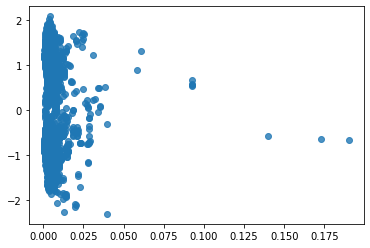

In [357]:
(cooks, p) =influence.cooks_distance
(dffits,p) = influence.dffits
leverage = influence.hat_matrix_diag
print("Leverage vs studentized residuals")
sns.regplot(leverage , modelson.resid_pearson , fit_reg = False)

# olması gerekenle kendi hatalarımzla karşılaştırıyoruz

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


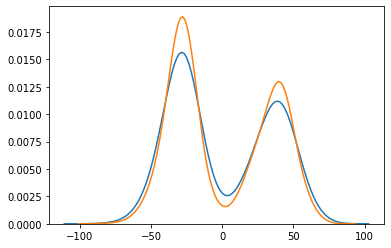

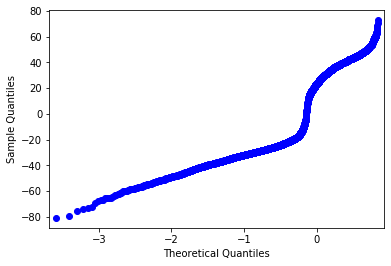

In [358]:
hwres = pd.concat([df , pd.Series(modelson.resid, name = 'resid'), pd.Series(modelson.predict(), name = "predict")], axis = 1)

sns.kdeplot(np.array(hwres.resid), bw=10)
sns.distplot(np.array(hwres.resid), hist=False)

sm.qqplot(hwres.resid)
plt.show()

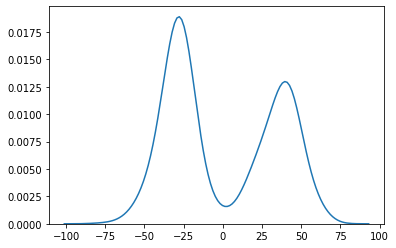

In [359]:
sns.distplot(np.array(hwres.resid), hist=False)

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


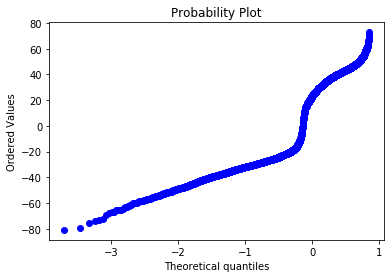

In [360]:
import pylab
stats.probplot(hwres.resid, dist="norm", plot=pylab)
pylab.show()

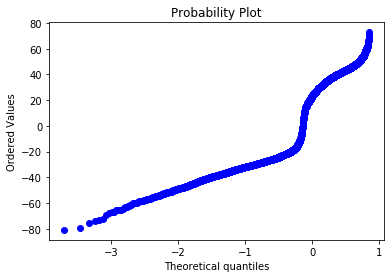

Hatalar Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)


C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [361]:
# benim hatalarım normal dağılımdan geliyor mu gelmiyor mu ? 
import pylab
stats.probplot(hwres.resid, dist="norm", plot=pylab)
pylab.show()
from scipy.stats import shapiro
stat, p =shapiro(hwres.resid)
alpha = 0.05
if p > alpha:
    print('Hatalar Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)')
else:
    print('Hatalar Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)')

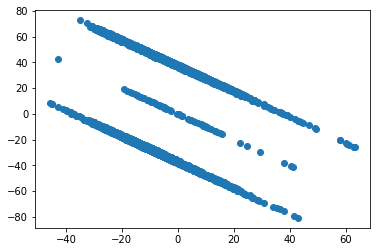

In [363]:
resid = modelson.resid
plt.scatter(modelson.predict(), resid)

In [364]:
# içerideki x lerin arasındaki korelasyonu test etmek için vıf var
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
lm = smf.ols("y ~ X" , df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     21.67
Date:                Thu, 20 Aug 2020   Prob (F-statistic):           5.33e-94
Time:                        16:32:56   Log-Likelihood:                -30732.
No. Observations:                6167   AIC:                         6.152e+04
Df Residuals:                    6141   BIC:                         6.169e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2277      5.473     -0.773      0.440     -14.956       6.501
X[0]          -0.0090      0.006     -1.411      0.158      -0.021       0.004
X[1]          -0.0326      0.016     -1.996      0.046      -0.065      -0.001
X[2]          -0.0351      0.053     -0.665      0.506      -0.138       0.068
X[3]           0.0779      0.040      1.957      0.050      -0.000       0.156
X[4]          -0.2853      0.076     -3.749      0.000      -0.434      -0.136
X[5]       -5.347e+04   2.02e+04     -2.648      0.008   -9.31e+04   -1.39e+04
X[6]           0.0193      0.015      1.314      0.189      -0.009       0.048
X[7]           5.3403      0.752      7.099      0.000       3.866       6.815
X[8]          -4.0114      6.086     -0.659      0.510     -15.941       7.919
X[9]        3.422e+04   1.33e+04      2.571      0.010    8126.000    6.03e+04
X[10]          8.1514      2.850      2.860      0.004       2.564      13.739
X[11]         -0.0554      1.190     -0.047      0.963      -2.388       2.277
X[12]         41.1610     10.283      4.003      0.000      21.003      61.319
X[13]         -8.2701      3.043     -2.718      0.007     -14.235      -2.305
X[14]        -29.0104      6.171     -4.701      0.000     -41.107     -16.914
X[15]          0.1767      0.074      2.389      0.017       0.032       0.322
X[16]          0.0619      0.059      1.051      0.293      -0.054       0.177
X[17]      -1.797e+04   4179.186     -4.300      0.000   -2.62e+04   -9777.563
X[18]          0.1714      0.032      5.365      0.000       0.109       0.234
X[19]          0.0346      0.009      3.804      0.000       0.017       0.052
X[20]          1.3947      0.222      6.295      0.000       0.960       1.829
X[21]       1.779e+04   3732.603      4.765      0.000    1.05e+04    2.51e+04
X[22]          0.1455      0.017      8.501      0.000       0.112       0.179
X[23]        967.8906    110.452      8.763      0.000     751.366    1184.416
X[24]          0.6336      0.130      4.892      0.000       0.380       0.887
==============================================================================
Omnibus:                    28713.197   Durbin-Watson:                   0.322
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              728.013
Skew:                           0.166   Prob(JB):                    8.20e-159
Kurtosis:                       1.350   Cond. No.                     5.82e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [365]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [366]:
vif = calc_vif(X)
vif

,variables,VIF
0,ind_29,1.733524
1,ind_8,4.674880
2,ind_116,3.169614
3,ind_22,11.257138
4,ind_62,4.157958
5,ind_349,1.169581
6,ind_237,4.448142
7,ind_82,2.708618
8,ind_340,1.471333
9,ind_334,5.398778


In [367]:
#vif değeri 10dan büyük olanlar modelden çıkarıldı
vif = vif[vif["VIF"] > 10]
for i in vif["variables"]:
    X = X.drop([i], axis = 1)

In [368]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=42,shuffle=0)
lm = LinearRegression()
model = lm.fit(X_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
model.score(X_train, y_train)

0.06785647363332326

In [369]:
np.sqrt(mean_squared_error(y_train , model.predict(X_train)))


35.58082900355266

In [370]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

36.176703268649526

# PCA(Principal Compenent Analysis)

In [384]:
y = df["90_target"]
X= dfnew

In [385]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,shuffle=False)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (4933, 130)
y_train (4933,)
X_test (1234, 130)
y_test (1234,)
training (6167, 136)


In [386]:
import statsmodels.api as sm 
lm=sm.OLS(y_train,X_train)
model1=lm.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              90_target   R-squared (uncentered):                   0.241
Model:                            OLS   Adj. R-squared (uncentered):              0.220
Method:                 Least Squares   F-statistic:                              11.70
Date:                Thu, 20 Aug 2020   Prob (F-statistic):                   1.31e-199
Time:                        16:43:47   Log-Likelihood:                         -24168.
No. Observations:                4933   AIC:                                  4.860e+04
Df Residuals:                    4803   BIC:                                  4.944e+04
Df Model:                         130                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_5          0.9555      0.871      1.097      0.273      -0.753       2.664
ind_6          0.3863      0.708      0.545      0.586      -1.002       1.775
ind_8      -3.607e+08   1.36e+08     -2.653      0.008   -6.27e+08   -9.42e+07
ind_9       3.607e+08   1.36e+08      2.653      0.008    9.42e+07    6.27e+08
ind_10      3.607e+08   1.36e+08      2.653      0.008    9.42e+07    6.27e+08
ind_12         5.3754      2.064      2.605      0.009       1.329       9.422
ind_13        -0.0254      0.027     -0.944      0.345      -0.078       0.027
ind_14        -0.0559      0.179     -0.312      0.755      -0.407       0.295
ind_15        -0.1591      0.259     -0.614      0.540      -0.667       0.349
ind_16         0.0165      0.384      0.043      0.966      -0.737       0.770
ind_17         1.3562      0.418      3.246      0.001       0.537       2.175
ind_18         1.5165      0.306      4.955      0.000       0.916       2.117
ind_19         1.1730      1.344      0.873      0.383      -1.461       3.807
ind_20        -0.4979      1.084     -0.459      0.646      -2.623       1.627
ind_21         0.8800      1.292      0.681      0.496      -1.652       3.413
ind_22        -0.0433      0.334     -0.130      0.897      -0.698       0.611
ind_23         0.0503      0.339      0.148      0.882      -0.615       0.716
ind_25     -1.707e+06   1.02e+06     -1.672      0.095   -3.71e+06    2.95e+05
ind_26     -1.706e+06   1.02e+06     -1.670      0.095   -3.71e+06    2.96e+05
ind_27      3.408e+06   2.04e+06      1.669      0.095   -5.96e+05    7.41e+06
ind_28         0.0032      0.012      0.271      0.786      -0.020       0.027
ind_29        -0.0375      0.019     -2.006      0.045      -0.074      -0.001
ind_30        -0.0169      0.021     -0.804      0.421      -0.058       0.024
ind_31         0.0642      0.029      2.241      0.025       0.008       0.120
ind_32        -0.0436      0.027     -1.606      0.108      -0.097       0.010
ind_33         0.0190      0.026      0.728      0.467      -0.032       0.070
ind_34         0.0100      0.029      0.340      0.734      -0.048       0.068
ind_35        -0.0280      0.024     -1.180      0.238      -0.074       0.018
ind_36         0.0348      0.017      2.015      0.044       0.001       0.069
ind_37     -3.856e-05      0.018     -0.002      0.998      -0.034       0.034
ind_39        -0.1546      0.085     -1.824      0.068      -0.321       0.012
ind_40         0.1450      1.339      0.108      0.914      -2.479       2.769
ind_41         0.1410      0.077      1.827      0.068      -0.010       0.292
ind_42         0.3056      0.383      0.798      0.425      -0.446       1.057
ind_43         0.3007      0.259      1.159      0.247      -

In [387]:
pva=model1.pvalues
removing=pva[pva>0.05]
removing

ind_5      0.272842
ind_6      0.585503
ind_13     0.345415
ind_14     0.755032
ind_15     0.539502
             ...   
ind_407    0.140218
ind_410    0.112400
ind_418    0.182653
ind_424    0.157899
ind_426    0.706920
Length: 81, dtype: float64

In [388]:
X_train=X_train.drop(removing.index,axis=1)
X_train.shape

(4933, 49)

In [389]:
X_test=X_test.drop(removing.index,axis=1)
X_test.shape

(1234, 49)

In [390]:
import statsmodels.api as sm 
lm=sm.OLS(y_train,X_train)
model2=lm.fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              90_target   R-squared (uncentered):                   0.208
Model:                            OLS   Adj. R-squared (uncentered):              0.200
Method:                 Least Squares   F-statistic:                              26.20
Date:                Thu, 20 Aug 2020   Prob (F-statistic):                   1.07e-207
Time:                        16:44:26   Log-Likelihood:                         -24271.
No. Observations:                4933   AIC:                                  4.864e+04
Df Residuals:                    4884   BIC:                                  4.896e+04
Df Model:                          49                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_8      -3.237e+08   1.32e+08     -2.456      0.014   -5.82e+08   -6.53e+07
ind_9       3.237e+08   1.32e+08      2.456      0.014    6.53e+07    5.82e+08
ind_10      3.237e+08   1.32e+08      2.456      0.014    6.53e+07    5.82e+08
ind_12         3.3948      0.438      7.758      0.000       2.537       4.253
ind_17         1.3321      0.184      7.231      0.000       0.971       1.693
ind_18         1.4695      0.279      5.276      0.000       0.923       2.016
ind_29        -0.0238      0.012     -1.924      0.054      -0.048       0.000
ind_31         0.0319      0.013      2.484      0.013       0.007       0.057
ind_36         0.0315      0.012      2.521      0.012       0.007       0.056
ind_50         1.4718      0.110     13.347      0.000       1.256       1.688
ind_51        -0.4637      0.052     -8.917      0.000      -0.566      -0.362
ind_71         0.0434      0.090      0.485      0.628      -0.132       0.219
ind_77         0.3566      0.093      3.850      0.000       0.175       0.538
ind_82        10.1220      1.249      8.101      0.000       7.672      12.572
ind_130       -1.3239      0.102    -12.996      0.000      -1.524      -1.124
ind_142       -0.1323      0.218     -0.606      0.545      -0.561       0.296
ind_145        7.3878      6.595      1.120      0.263      -5.542      20.318
ind_147       -0.4450      0.158     -2.815      0.005      -0.755      -0.135
ind_153       -5.3076      0.409    -12.983      0.000      -6.109      -4.506
ind_164        0.0804      0.068      1.177      0.239      -0.053       0.214
ind_188        0.1239      0.047      2.655      0.008       0.032       0.215
ind_194        0.4358      0.125      3.475      0.001       0.190       0.682
ind_217        2.2460      0.566      3.970      0.000       1.137       3.355
ind_225     1.733e+04   4721.393      3.670      0.000    8069.595    2.66e+04
ind_228      -29.6080      3.583     -8.264      0.000     -36.632     -22.584
ind_234    -4.218e+06   1.15e+06     -3.655      0.000   -6.48e+06   -1.96e+06
ind_237        0.3317      0.025     13.513      0.000       0.284       0.380
ind_239     2.884e+04   5964.116      4.835      0.000    1.71e+04    4.05e+04
ind_241        9.5780      1.134      8.446      0.000       7.355      11.801
ind_243     -767.9267     92.026     -8.345      0.000    -948.339    -587.515
ind_310       -5.2432      1.378     -3.806      0.000      -7.944      -2.542
ind_311       -7.2528      1.413     -5.131      0.000     -10.024      -4.482
ind_313      609.6146    118.356      5.151      0.000     377.584     841.646
ind_315       -5.9187      0.908     -6.519      0.000      -7.699      -4.139
ind_316        3.4746      0.997      3.487      0.000       

In [396]:
target=df['90_target'] 
features= X_test
corrx = pd.concat([target, features], axis=1, keys=['target', 'features']).corr().loc['features', 'target']
cx = corrx.abs().unstack()
cx.sort_values(ascending = False)

90_target  ind_18     0.318727
           ind_324    0.179716
           ind_310    0.162588
           ind_237    0.147875
           ind_321    0.140501
           ind_8      0.117640
           ind_17     0.115902
           ind_51     0.102630
           ind_10     0.097582
           ind_340    0.096760
           ind_82     0.096133
           ind_228    0.090126
           ind_234    0.083906
           ind_412    0.081516
           ind_225    0.080904
           ind_332    0.074169
           ind_153    0.073672
           ind_50     0.062145
           ind_416    0.056695
           ind_130    0.050968
           ind_313    0.050223
           ind_311    0.045231
           ind_428    0.045084
           ind_9      0.043973
           ind_241    0.041579
           ind_31     0.041520
           ind_36     0.038992
           ind_392    0.038179
           ind_315    0.035971
           ind_243    0.035594
           ind_142    0.031101
           ind_77     0.028871
        

In [397]:
##target ve diğer değişkenler arasında korelansyonu en yüksek olanlar
cx.sort_values(ascending=True, inplace=True)
columns_above_x = [(col1, col2) for col1, col2 in c1.index if c1[col1,col2] > 0.05 and col1 != col2]

In [398]:
columns_above_x

[('90_target', 'ind_83'),
 ('90_target', 'ind_19'),
 ('90_target', 'ind_321'),
 ('90_target', 'ind_406'),
 ('90_target', 'ind_70'),
 ('90_target', 'ind_71'),
 ('90_target', 'ind_228'),
 ('90_target', 'ind_130'),
 ('90_target', 'ind_309'),
 ('90_target', 'ind_118'),
 ('90_target', 'ind_67'),
 ('90_target', 'ind_5'),
 ('90_target', 'ind_102'),
 ('90_target', 'ind_20'),
 ('90_target', 'ind_128'),
 ('90_target', 'ind_6'),
 ('90_target', 'ind_142'),
 ('90_target', 'ind_318'),
 ('90_target', 'ind_21'),
 ('90_target', 'ind_239'),
 ('90_target', 'ind_74'),
 ('90_target', 'ind_316'),
 ('90_target', 'ind_25'),
 ('90_target', 'ind_310'),
 ('90_target', 'ind_37'),
 ('90_target', 'ind_36'),
 ('90_target', 'ind_14'),
 ('90_target', 'ind_77'),
 ('90_target', 'ind_23'),
 ('90_target', 'ind_26'),
 ('90_target', 'ind_15'),
 ('90_target', 'ind_330'),
 ('90_target', 'ind_418'),
 ('90_target', 'ind_324'),
 ('90_target', 'ind_16'),
 ('90_target', 'ind_332'),
 ('90_target', 'ind_412'),
 ('90_target', 'ind_17

In [400]:
yy=dfnan["90_target"]
Xx=dfnan[['ind_83','ind_19','ind_406','ind_70','ind_71','ind_228','ind_130','ind_309','ind_118',
'ind_67','ind_5','ind_102','ind_20','ind_128','ind_142','ind_318','ind_21','ind_239',
 'ind_74','ind_316','ind_25','ind_310','ind_37','ind_36','ind_14','ind_77','ind_23',
 'ind_26','ind_15','ind_330','ind_418','ind_324','ind_16','ind_332','ind_412','ind_17','ind_18']]


In [401]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(Xx, yy, test_size=0.25, random_state=42)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (4625, 37)
y_train (4625,)
X_test (1542, 37)
y_test (1542,)
training (6167, 136)


In [403]:
import statsmodels.api as sm 
lm=sm.OLS(y_train,X_train)
modell=lm.fit()
modell.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              90_target   R-squared (uncentered):                   0.091
Model:                            OLS   Adj. R-squared (uncentered):              0.084
Method:                 Least Squares   F-statistic:                              12.43
Date:                Thu, 20 Aug 2020   Prob (F-statistic):                    2.22e-70
Time:                        16:58:41   Log-Likelihood:                         -23043.
No. Observations:                4625   AIC:                                  4.616e+04
Df Residuals:                    4588   BIC:                                  4.640e+04
Df Model:                          37                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_83        -0.1949      0.076     -2.570      0.010      -0.344      -0.046
ind_19         0.8080      1.075      0.751      0.452      -1.300       2.916
ind_406        0.2391      0.206      1.160      0.246      -0.165       0.643
ind_70         5.0090      1.787      2.803      0.005       1.506       8.512
ind_71        -0.0774      0.122     -0.634      0.526      -0.317       0.162
ind_228       -8.8169      3.077     -2.866      0.004     -14.848      -2.785
ind_130        0.0396      0.060      0.660      0.509      -0.078       0.157
ind_309     2.217e+04   9379.079      2.364      0.018    3784.196    4.06e+04
ind_118     5451.1182   4919.414      1.108      0.268   -4193.300    1.51e+04
ind_67         0.1281      1.787      0.072      0.943      -3.375       3.631
ind_5          0.1929      0.221      0.875      0.382      -0.239       0.625
ind_102       -1.7871      0.874     -2.045      0.041      -3.501      -0.074
ind_20        -1.3550      1.065     -1.272      0.203      -3.443       0.733
ind_128       -1.7409      0.743     -2.343      0.019      -3.197      -0.284
ind_142       -0.2993      0.093     -3.203      0.001      -0.482      -0.116
ind_318     -112.5856     24.159     -4.660      0.000    -159.950     -65.221
ind_21         1.2245      1.077      1.137      0.256      -0.886       3.335
ind_239     1.201e+04   4484.331      2.678      0.007    3217.027    2.08e+04
ind_74        -0.3105      0.166     -1.874      0.061      -0.635       0.014
ind_316        1.3813      0.292      4.731      0.000       0.809       1.954
ind_25     -1682.7220    747.637     -2.251      0.024   -3148.450    -216.994
ind_310        2.2452      1.329      1.690      0.091      -0.360       4.850
ind_37         0.0323      0.017      1.952      0.051      -0.000       0.065
ind_36        -0.0049      0.016     -0.305      0.761      -0.036       0.027
ind_14         0.1990      0.148      1.346      0.178      -0.091       0.489
ind_77         0.5721      0.138      4.160      0.000       0.302       0.842
ind_23        -0.1225      0.080     -1.535      0.125      -0.279       0.034
ind_26      -917.9581    784.451     -1.170      0.242   -2455.859     619.942
ind_15        -0.3013      0.254     -1.185      0.236      -0.800       0.197
ind_330        0.4905      1.882      0.261      0.794      -3.199       4.180
ind_418       -0.0028      0.075     -0.037      0.971      -0.151       0.145
ind_324    -1.904e+04   5031.840     -3.783      0.000   -2.89e+04   -9172.147
ind_16         0.1066      0.394      0.271      0.787      -0.665       0.878
ind_332        0.1536      0.029      5.336      0.000       0.097       0.210
ind_412     1115.6557    135.957      8.206      0.000     84

In [404]:
pva1=modell.pvalues
removing=pva1[pva1>0.05]
removing

ind_19     0.452474
ind_406    0.246175
ind_71     0.526182
ind_130    0.509438
ind_118    0.267884
ind_67     0.942867
ind_5      0.381677
ind_20     0.203399
ind_21     0.255507
ind_74     0.061056
ind_310    0.091188
ind_37     0.050977
ind_36     0.760731
ind_14     0.178332
ind_23     0.124816
ind_26     0.241984
ind_15     0.235993
ind_330    0.794369
ind_418    0.970601
ind_16     0.786501
dtype: float64

In [405]:
X_train=X_train.drop(removing.index,axis=1)
X_train.shape

(4625, 17)

In [406]:

X_test=X_test.drop(removing.index,axis=1)
X_test.shape

(1542, 17)

In [407]:
import statsmodels.api as sm 
lm=sm.OLS(y_train,X_train)
modelson=lm.fit()
modelson.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              90_target   R-squared (uncentered):                   0.083
Model:                            OLS   Adj. R-squared (uncentered):              0.080
Method:                 Least Squares   F-statistic:                              24.65
Date:                Thu, 20 Aug 2020   Prob (F-statistic):                    8.27e-75
Time:                        16:59:34   Log-Likelihood:                         -23063.
No. Observations:                4625   AIC:                                  4.616e+04
Df Residuals:                    4608   BIC:                                  4.627e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_83        -0.1129      0.066     -1.705      0.088      -0.243       0.017
ind_70         2.9839      0.841      3.547      0.000       1.334       4.633
ind_228       -7.6933      2.845     -2.704      0.007     -13.272      -2.115
ind_309      2.69e+04   9034.880      2.978      0.003    9192.138    4.46e+04
ind_102       -1.3898      0.856     -1.624      0.105      -3.068       0.288
ind_128       -1.2894      0.712     -1.810      0.070      -2.686       0.107
ind_142       -0.3458      0.084     -4.117      0.000      -0.511      -0.181
ind_318     -116.2302     23.583     -4.929      0.000    -162.464     -69.997
ind_239     1.046e+04   4153.205      2.517      0.012    2313.248    1.86e+04
ind_316        1.4247      0.285      4.994      0.000       0.865       1.984
ind_25     -1902.2301    572.513     -3.323      0.001   -3024.629    -779.831
ind_77         0.3080      0.079      3.899      0.000       0.153       0.463
ind_324    -1.535e+04   4668.384     -3.288      0.001   -2.45e+04   -6196.522
ind_332        0.1503      0.019      7.946      0.000       0.113       0.187
ind_412     1119.7029    125.893      8.894      0.000     872.892    1366.514
ind_17         1.0330      0.193      5.353      0.000       0.655       1.411
ind_18         0.9053      0.239      3.794      0.000       0.438       1.373
==============================================================================
Omnibus:                    21384.917   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              551.057
Skew:                           0.159   Prob(JB):                    2.19e-120
Kurtosis:                       1.339   Cond. No.                     1.80e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [408]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA()

In [409]:
#datalarımın aynı scalede düzlemde oluşu önemli pca için
x_reduced_train = pca.fit_transform(scale(X_train))
x_reduced_train[0:1,:]

array([[ 4.07531977e+00,  1.62707567e+00,  2.44471787e+00,
         8.76096599e-02,  1.09558980e-01, -5.15928565e-01,
        -7.92864303e-02, -4.68402983e-01, -4.00806140e-01,
        -4.63389318e-01, -4.22056475e-01, -2.76834503e-01,
         4.77077770e-01, -4.03042532e-01, -5.81183046e-01,
         2.59773176e-03,  3.62745091e-02]])

In [410]:
import numpy as np
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)

array([ 35.08,  49.25,  61.25,  67.64,  73.17,  78.13,  82.47,  86.51,
        90.42,  93.39,  96.05,  97.68,  98.91,  99.64, 100.01, 100.02,
       100.02])

([<matplotlib.axis.XTick at 0x1f0bb68b3c8>,
 <a list of 17 Text xticklabel objects>)

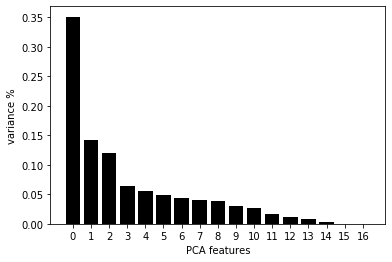

In [411]:
import matplotlib.pyplot as plt
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [412]:
def pca_fon(X, threshold):
    pca = PCA()
    X_pca = pca.fit_transform(scale(X))
    arr = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)
    num_var = sum((arr < threshold*100)) + 1 
    print('pca sonrası değişken sayısı: ',num_var)
    X_pcad = pd.DataFrame(X_pca[:,0:num_var], index = X.index)
    return X_pcad

In [415]:
#%70 için kaç değişken kullanmalıyım?
print(pca_fon(X_train, 0.70))

pca sonrası değişken sayısı:  5
             0         1         2         3         4
5059  4.075320  1.627076  2.444718  0.087610  0.109559
1730  1.779825  0.000479 -1.060927 -0.432530 -0.706653
4119  2.133751 -2.179435  1.394413  0.733744  0.567861
61    0.802995 -0.107182 -1.830128  0.559207  0.992114
1665  0.897798 -0.376360 -1.560029  0.911795  0.014750
...        ...       ...       ...       ...       ...
3772  1.715139 -0.910487 -1.491443 -0.162901 -0.611779
5191 -0.318243  1.684649 -0.060702  0.146666  0.239478
5226 -1.640695 -0.928977 -0.591997  0.130464  0.651515
5390 -1.216922  0.067857 -0.268870  0.155410  0.172469
860  -0.656189  3.223917 -0.527522 -0.671099  2.820608

[4625 rows x 5 columns]


In [416]:
pca = PCA(n_components = 5)
X_reduced_train = pca.fit_transform(scale(X_train))
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)

In [417]:
pcr_model.intercept_

-3.284856445450811

In [418]:
pcr_model.coef_

array([-1.65261483,  3.37592209,  0.22860965,  0.06962223, -0.87015724])

In [419]:
y_pred= pcr_model.predict(X_reduced_train)
y_pred[0:5]

array([ -4.05725751,  -5.88235714, -14.29299427,  -6.21648127,
        -6.34512493])

In [420]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_train, y_pred))

36.25373510309236

In [421]:
df["90_target"].mean()

-3.315072358419006

In [422]:
r2_score(y_train, y_pred)

0.032796227940802614

Text(0, 0.5, 'PCA 2')

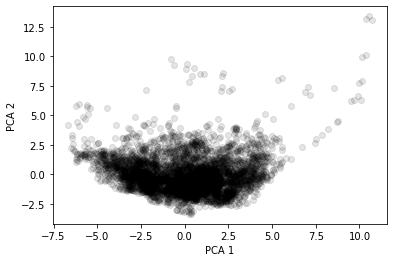

In [423]:
#datada belirli bir kümelenme varsa görelim
X_reduced_train = pca.fit_transform(scale(X_train))
PCA_components = pd.DataFrame(X_reduced_train)
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color ='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# RandomForestRegressor

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
y= df["90_target"]
X= df.drop(["20_target","50_target","90_target", "ind_420", "ind_422"],axis=1)

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42, shuffle=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((4625, 131), (1542, 131), (4625,), (1542,))

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rfr_model = RandomForestRegressor(random_state=42)
rfr_model.fit(X_train, y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [34]:
from sklearn.metrics import mean_squared_error
y_pred = rfr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

17.613044481751544

# Model Tunning

In [35]:
rfr_params = {"max_depth": list(range(1,10)),
              "max_features": [3,5,10],
              "n_estimators": [100,200,500, 1000]}

In [36]:
rfr_model = RandomForestRegressor(random_state=42)

In [37]:
rfr_cv_model = GridSearchCV(rfr_model, 
                           rfr_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2)
rfr_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 15.3min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7,

In [38]:
rfr_cv_model.best_params_

{'max_depth': 9, 'max_features': 10, 'n_estimators': 200}

In [39]:
rfr_tuned = RandomForestRegressor(max_depth=9,
                                  max_features=10,
                                  n_estimators=200)

In [40]:
rfr_tuned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [41]:
y_pred = rfr_tuned.predict(X_test)

In [42]:
np.sqrt(mean_squared_error(y_test, y_pred))

24.52176768129268

In [43]:
Importance = pd.DataFrame({"Importance":rfr_tuned.feature_importances_*100}, index=X_train.columns)

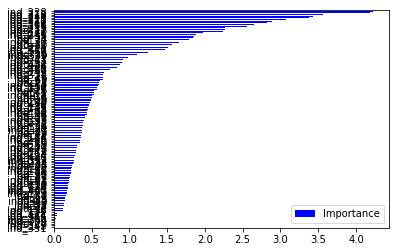

In [44]:
Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color ='b')
plt.show()

In [45]:
Importance

,Importance
ind_5,0.535505
ind_6,0.502817
ind_8,0.127044
ind_9,0.152133
ind_10,0.341963
...,...
ind_416,0.741782
ind_418,0.462141
ind_424,0.044475
ind_426,0.276868


In [46]:
c1 = Importance.abs().unstack()
c1.sort_values(ascending = False)

Importance  ind_228    4.222675
            ind_313    4.188044
            ind_318    3.568485
            ind_243    3.428099
            ind_225    3.381158
                         ...   
            ind_109    0.014651
            ind_28     0.010622
            ind_352    0.001765
            ind_349    0.000000
            ind_351    0.000000
Length: 131, dtype: float64

In [47]:
#importance 0.5'ten büyük olanlarla yeniden model kur
c1.sort_values(ascending=True, inplace=True)
columns_above_1 = [(col1, col2) for col1, col2 in c1.index if c1[col1,col2] > 0.5 and col1 != col2]

In [48]:
columns_above_1

[('Importance', 'ind_6'),
 ('Importance', 'ind_118'),
 ('Importance', 'ind_5'),
 ('Importance', 'ind_41'),
 ('Importance', 'ind_26'),
 ('Importance', 'ind_176'),
 ('Importance', 'ind_150'),
 ('Importance', 'ind_414'),
 ('Importance', 'ind_25'),
 ('Importance', 'ind_21'),
 ('Importance', 'ind_65'),
 ('Importance', 'ind_49'),
 ('Importance', 'ind_16'),
 ('Importance', 'ind_327'),
 ('Importance', 'ind_35'),
 ('Importance', 'ind_142'),
 ('Importance', 'ind_416'),
 ('Importance', 'ind_83'),
 ('Importance', 'ind_324'),
 ('Importance', 'ind_428'),
 ('Importance', 'ind_82'),
 ('Importance', 'ind_332'),
 ('Importance', 'ind_71'),
 ('Importance', 'ind_17'),
 ('Importance', 'ind_321'),
 ('Importance', 'ind_330'),
 ('Importance', 'ind_36'),
 ('Importance', 'ind_153'),
 ('Importance', 'ind_316'),
 ('Importance', 'ind_412'),
 ('Importance', 'ind_234'),
 ('Importance', 'ind_50'),
 ('Importance', 'ind_37'),
 ('Importance', 'ind_130'),
 ('Importance', 'ind_77'),
 ('Importance', 'ind_74'),
 ('Importance

In [49]:
X1 = df[["ind_313", "ind_228", "ind_318", "ind_243", "ind_225","ind_310","ind_311", "ind_309", "ind_156", "ind_315", "ind_237",
        "ind_18","ind_241", "ind_132", "ind_239", "ind_74", "ind_51", "ind_77","ind_130","ind_37", "ind_50", "ind_234","ind_412",
        "ind_316", "ind_153", "ind_36", "ind_330", "ind_17", "ind_321", "ind_71", "ind_332", "ind_82", "ind_428","ind_324", "ind_83",
         "ind_416", "ind_142", "ind_35", "ind_327", "ind_16","ind_49", "ind_65", "ind_21", "ind_25", "ind_414", "ind_150","ind_26",
         "ind_176", "ind_5","ind_41", "ind_118","ind_6"]]
y= df["90_target"]

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.25,random_state=42, shuffle=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4625, 52), (1542, 52), (4625,), (1542,))

In [51]:
rfr_model_import = RandomForestRegressor(random_state=42)
rfr_model_import.fit(X_train, y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [52]:
from sklearn.metrics import mean_squared_error
y_pred = rfr_model_import.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

16.022948604123798

# Model Tunning

In [53]:
rfr_params_import = {"max_depth": list(range(1,10)),
              "max_features": [3,5,10],
              "n_estimators": [100,200,500, 1000]}


In [54]:
rfr_model_import = RandomForestRegressor(random_state=42)

In [55]:
rfr_cv_model_import = GridSearchCV(rfr_model, 
                           rfr_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2)
rfr_cv_model_import.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 18.5min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7,

In [56]:
rfr_cv_model_import.best_params_

{'max_depth': 9, 'max_features': 10, 'n_estimators': 1000}

In [57]:
rfr_tuned_import = RandomForestRegressor(max_depth=9,
                                  max_features=10,
                                  n_estimators=1000)

In [58]:
rfr_tuned_import.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [59]:
y_pred = rfr_tuned_import.predict(X_test)

In [60]:
np.sqrt(mean_squared_error(y_test, y_pred))

20.891609234596572

# DecisionTreeRegressor

In [61]:
y= df["90_target"]
X= df.drop(["20_target","50_target","90_target", "ind_420", "ind_422"],axis=1)

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42, shuffle=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4625, 131), (1542, 131), (4625,), (1542,))

In [63]:
from sklearn.tree import DecisionTreeRegressor
cart_model =  DecisionTreeRegressor()

In [64]:
?cart_model

In [65]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

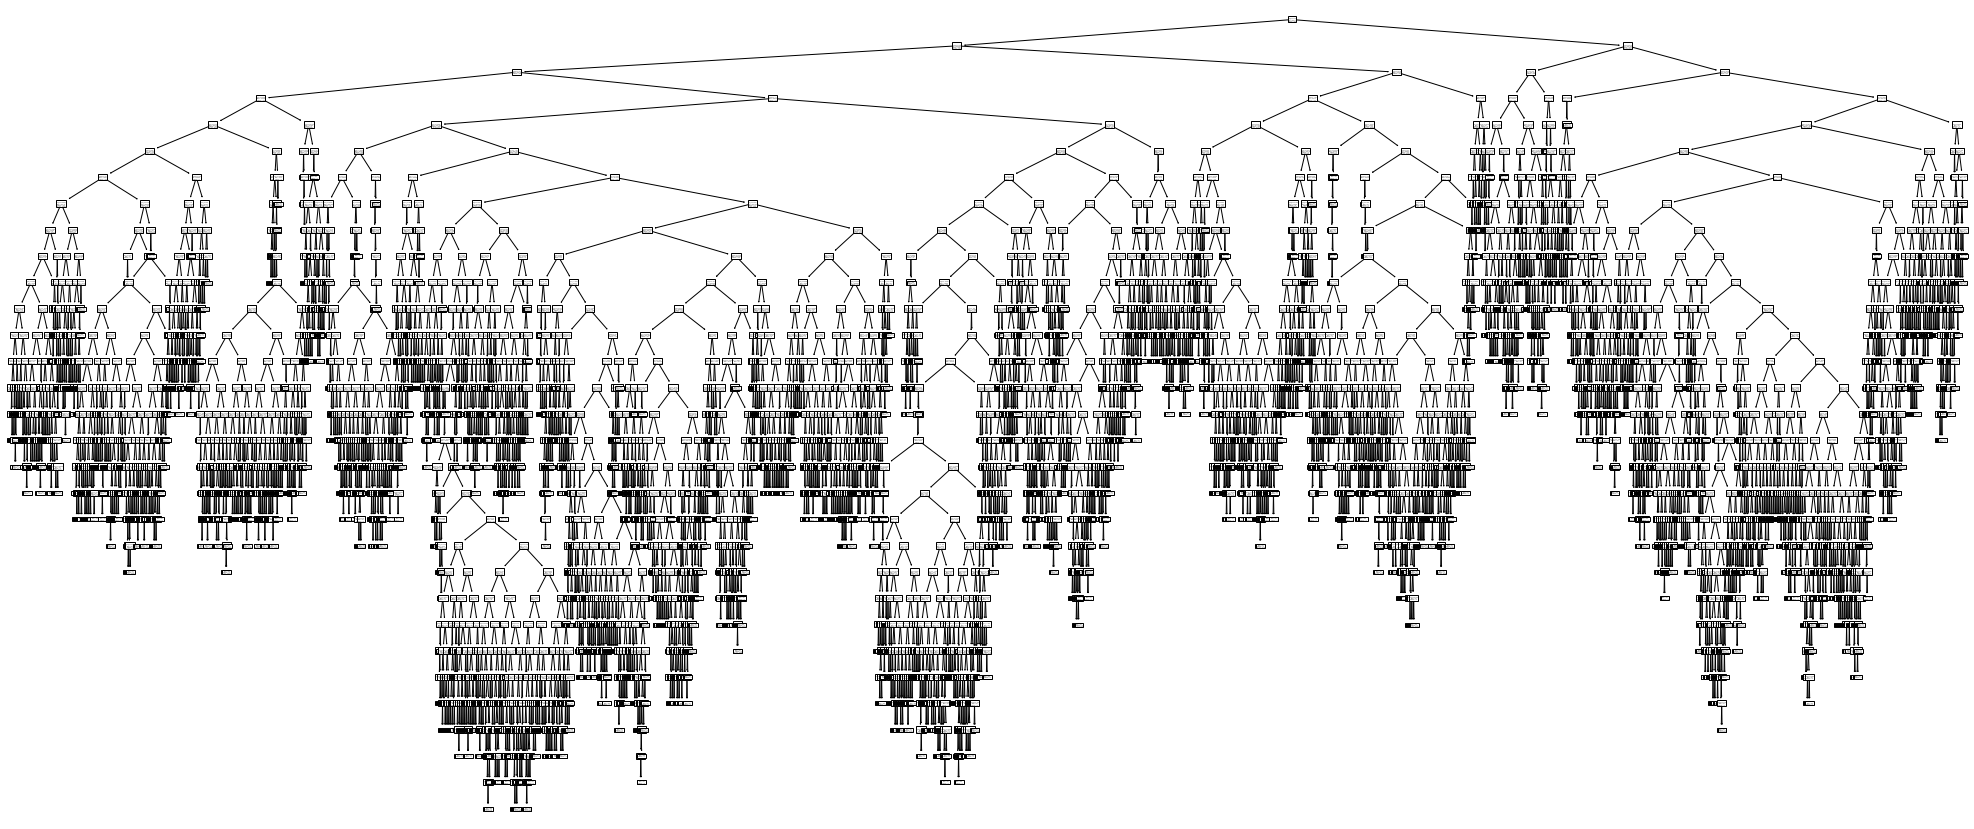

In [66]:
plt.figure(figsize=(35,15))
tree.plot_tree(cart_model);

In [67]:
from skompiler import skompile

In [68]:
print(skompile(cart_model.predict).to('python/code'))

(((((((((((((((-36.34972643 if x[90] <= 40.77944564819336 else -36.35648951 if
    x[28] <= -104.42278099060059 else -36.358333985) if x[128] <= 
    0.3617021143436432 else (-36.3730898 if x[43] <= -8.0 else -36.37554911
    ) if x[125] <= 5.5 else -36.36755637) if x[95] <= -0.14452823996543884 else
    (((-36.39768283 if x[115] <= -74.36329460144043 else -36.40014214) if x
    [83] <= 24.927817344665527 else -36.40352368) if x[129] <= 
    0.5195126533508301 else -36.41305348) if x[127] <= -19.5 else 
    -36.3872308 if x[47] <= 4.5 else -36.387999324999996) if x[92] <= 
    103.78136444091797 else ((-36.25780998 if x[68] <= 1.0 else 
    -36.25996187) if x[57] <= -0.00017549999392940663 else -36.25227655 if 
    x[117] <= -1.3249999284744263 else -36.25473585) if x[116] <= 
    -18.57297706604004 else ((-36.32421116 if x[18] <= 
    -0.002507979515939951 else -36.3205222) if x[56] <= -11.5 else (
    -36.32974459 if x[118] <= 0.0015065555344335735 else -36.32820753) if x
    [68] <=

In [69]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred  = cart_model.predict(X_test)

In [70]:
np.sqrt(mean_squared_error(y_test, y_pred))

21.6866527373443

# Model Tunning

In [71]:
cart_params = {"min_samples_split": range(2,50),
               "min_samples_leaf": [10,15,20],
               "max_leaf_nodes": range(4,10)}

In [72]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv =10, n_jobs = -1, verbose=2)

In [73]:
cart_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 864 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | 

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_leaf_nodes': range(4, 10),
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': range(2, 50)},
             pre_dispatch='2*n_jobs'

In [74]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_leaf': 10, 'min_samples_split': 49}

In [75]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes=9, 
                                   min_samples_leaf=10, 
                                   min_samples_split=49)
cart_tuned.fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)

In [76]:
np.sqrt(mean_squared_error(y_test, y_pred))

34.443294762006076

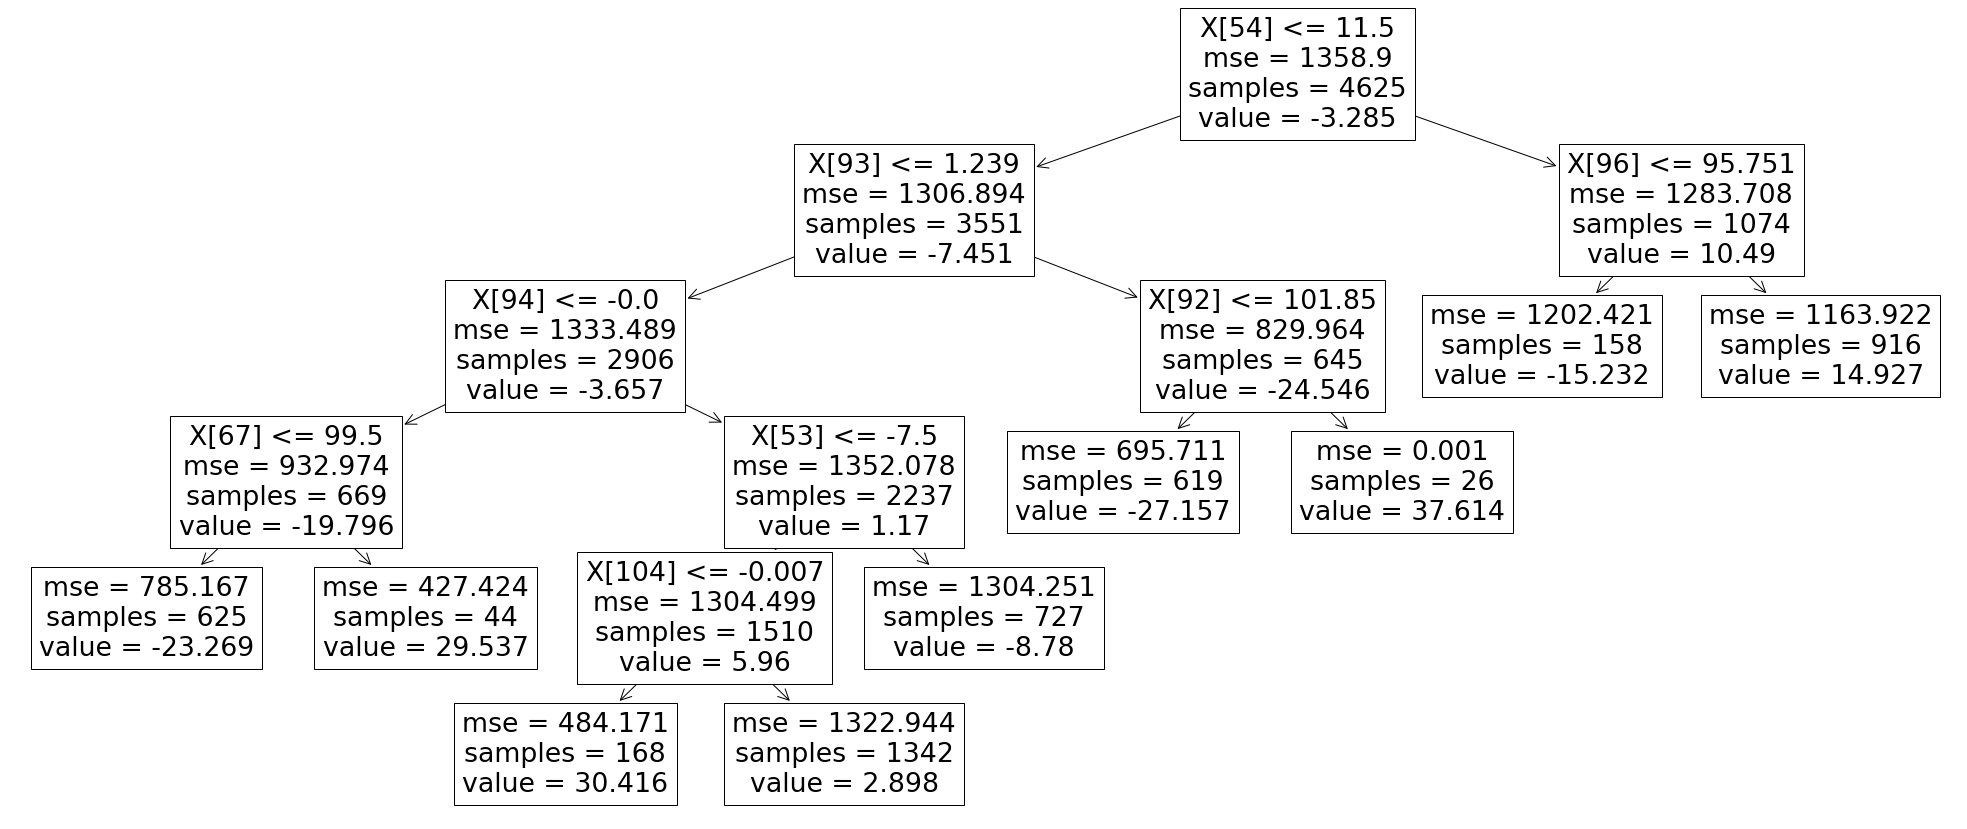

In [77]:
plt.figure(figsize=(35,15))
tree.plot_tree(cart_tuned);

In [84]:
#importance 0.5'ten büyük olanlarla yeniden model kur
X1 = df[["ind_313", "ind_228", "ind_318", "ind_243", "ind_225","ind_310","ind_311", "ind_309", "ind_156", "ind_77", "ind_237",
        "ind_18", "ind_132", "ind_315", "ind_239", "ind_51", "ind_241", "ind_37","ind_316","ind_412", "ind_234", "ind_130",
        "ind_50", "ind_74", "ind_36", "ind_153", "ind_17", "ind_321", "ind_330", "ind_332", "ind_324", "ind_83","ind_416", "ind_71",
         "ind_142", "ind_428", "ind_82", "ind_118", "ind_327","ind_414", "ind_16", "ind_35", "ind_49", "ind_22", "ind_150","ind_26",
         "ind_65", "ind_5","ind_176", "ind_128","ind_102", "ind_21", "ind_139", "ind_62"]]
y= df["90_target"]

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.25,random_state=42, shuffle=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4625, 54), (1542, 54), (4625,), (1542,))

In [86]:
from sklearn.tree import DecisionTreeRegressor
cart_model =  DecisionTreeRegressor()

In [88]:
cart_model_import = DecisionTreeRegressor(random_state=42)
?cart_model

In [89]:
cart_model_import.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

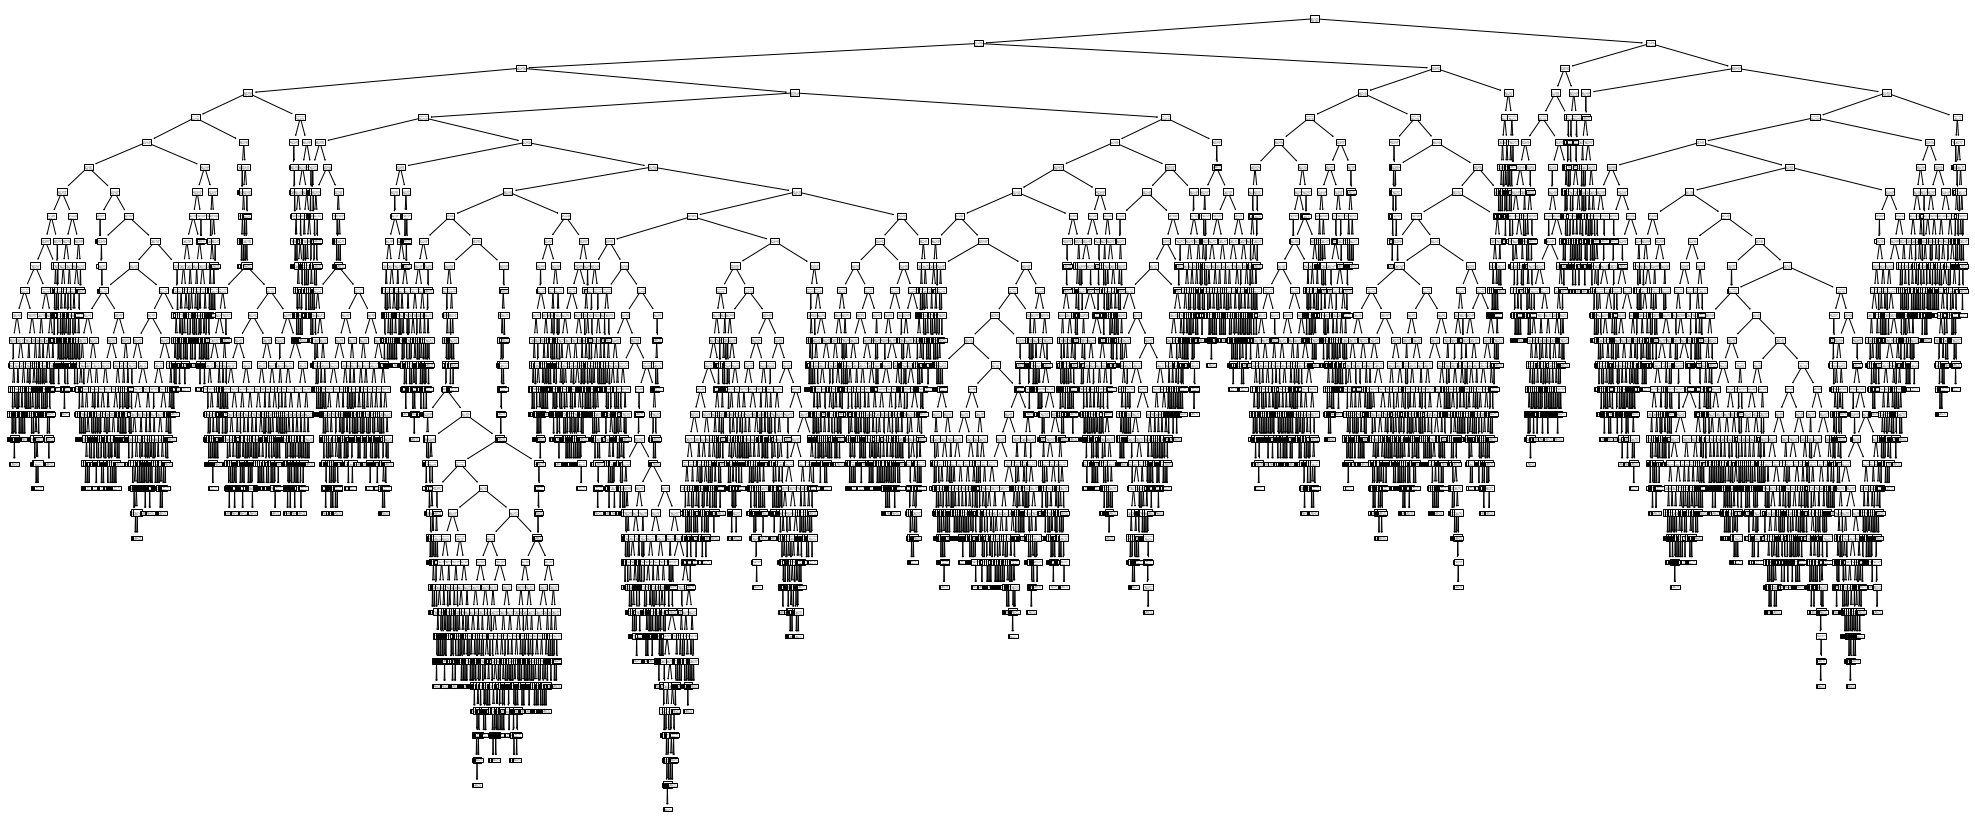

In [90]:
plt.figure(figsize=(35,15))
tree.plot_tree(cart_model_import);

In [91]:
from skompiler import skompile
print(skompile(cart_model_import.predict).to('python/code'))

((((((((((((((-35.59933163 if x[33] <= -13.5 else ((-35.78132004 if x[24] <=
    -174.1984405517578 else -35.7920795) if x[6] <= 101.16676330566406 else
    -35.76902353) if x[33] <= -11.5 else (-35.74227861 if x[42] <= 41.5 else
    -35.73705259 if x[1] <= 1.221360445022583 else -35.73858966) if x[43] <=
    -17.5 else -35.73274881 if x[37] <= -0.0019338304991833866 else 
    -35.73121175) if x[8] <= 45.47918128967285 else ((-35.87754027 if x[17] <=
    -50.348005294799805 else -35.88522559) if x[48] <= -12.556004524230957 else
    -35.88829972 if x[45] <= -0.0028395189438015223 else -35.89321833 if x[
    36] <= 0.5 else -35.89690728) if x[42] <= 16.0 else ((-35.87200684 if x
    [35] <= 0.31864775717258453 else -35.87538838) if x[12] <= -37.5 else 
    -35.86770306 if x[52] <= 28.888514518737793 else -35.86585858) if x[42] <=
    19.5 else (-35.860478855 if x[41] <= -141.0886993408203 else 
    -35.855713955) if x[6] <= 100.30195999145508 else -35.84218779) if x[41
    ] <= -15.6964

In [92]:
cart_model_import = DecisionTreeRegressor()
cart_model_import.fit(X_train, y_train)
y_pred  = cart_model_import.predict(X_test)

In [93]:
np.sqrt(mean_squared_error(y_test, y_pred))

20.445353283892093

# Model Tunning

In [94]:
cart_params_import = {"min_samples_split": range(2,50),
               "min_samples_leaf": [10,15,20],
               "max_leaf_nodes": range(4,10)}

In [95]:
cart_cv_model_import = GridSearchCV(cart_model_import, cart_params_import, cv =10, n_jobs = -1, verbose=2)

In [96]:
cart_cv_model_import.fit(X_train, y_train)

Fitting 10 folds for each of 864 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | 

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_leaf_nodes': range(4, 10),
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': range(2, 50)},
             pre_dispatch='2*n_jobs'

In [97]:
cart_cv_model_import.best_params_

{'max_leaf_nodes': 9, 'min_samples_leaf': 10, 'min_samples_split': 8}

In [98]:
cart_tuned_import = DecisionTreeRegressor(max_leaf_nodes=9, 
                                   min_samples_leaf=10, 
                                   min_samples_split=8)
cart_tuned_import.fit(X_train, y_train)
y_pred = cart_tuned_import.predict(X_test)

In [99]:
np.sqrt(mean_squared_error(y_test, y_pred))

34.443294762006076

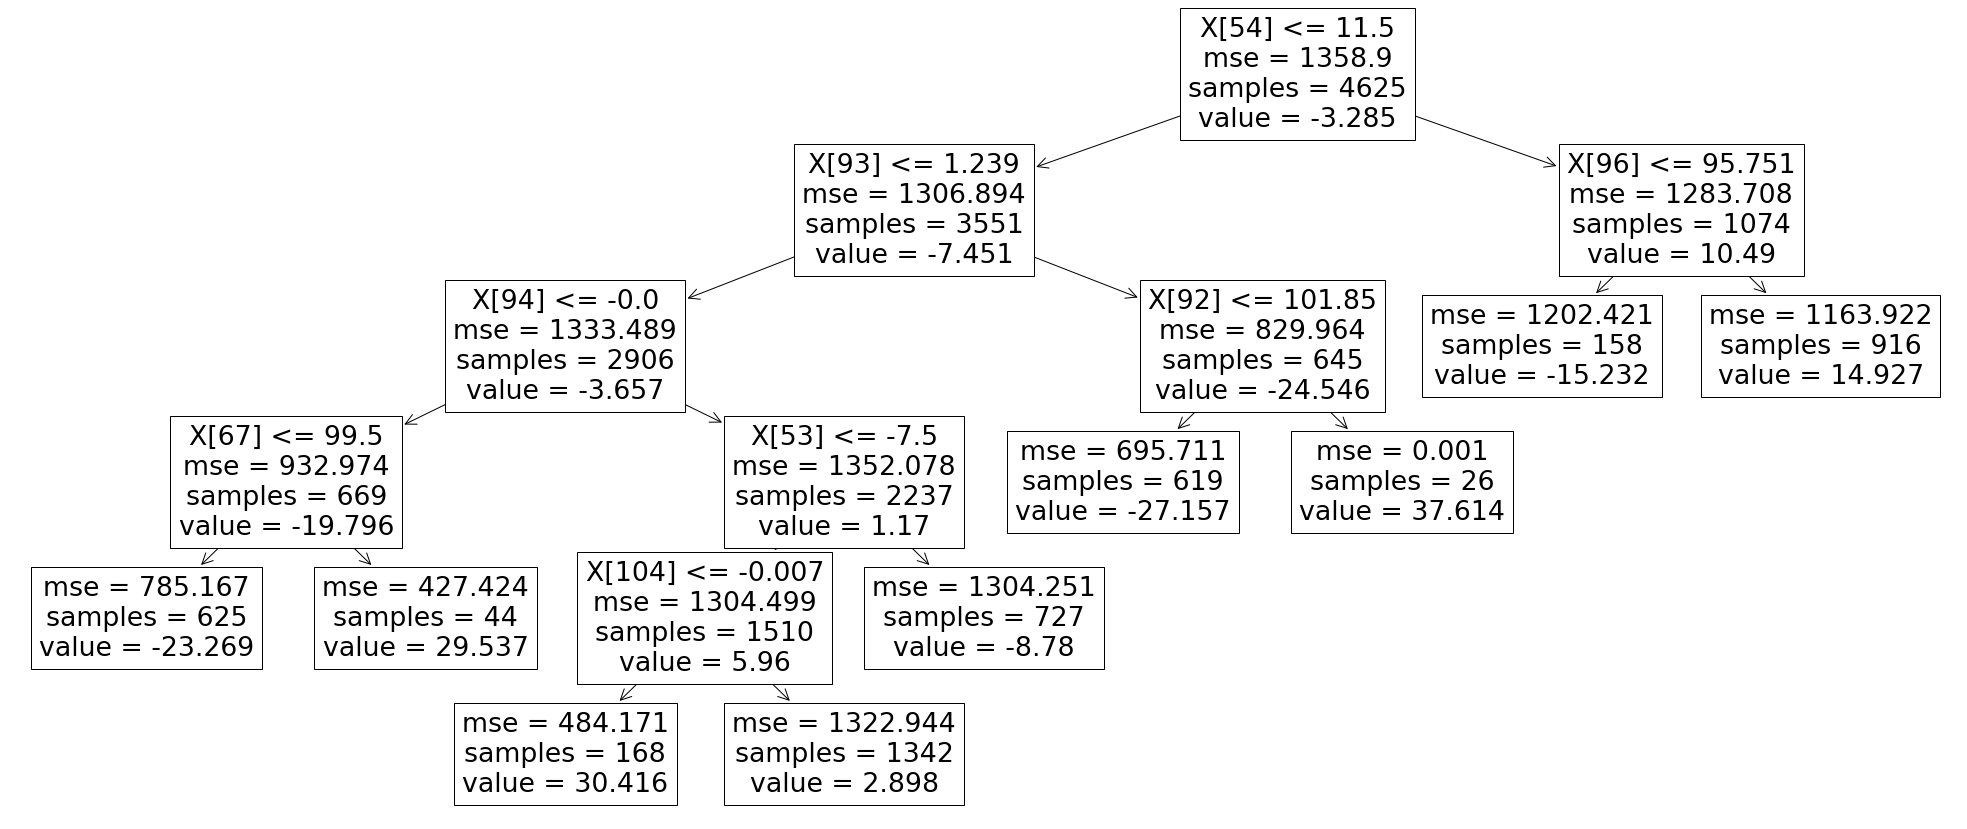

In [100]:
plt.figure(figsize=(35,15))
tree.plot_tree(cart_tuned);

# MLPRegressor

In [101]:
y= df["90_target"]
X= df.drop(["20_target","50_target","90_target", "ind_420", "ind_422"],axis=1)

In [102]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42, shuffle=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4625, 131), (1542, 131), (4625,), (1542,))

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [104]:
X_train_scaled = scaler.transform(X_train)

In [105]:
scaler.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [106]:
X_test_scaled = scaler.transform(X_test)

In [107]:
from sklearn.neural_network import MLPRegressor

In [108]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100,20)).fit(X_train_scaled, y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [109]:
mlp_model.n_layers_

4

In [110]:
mlp_model.hidden_layer_sizes

(100, 20)

In [111]:
y_pred = mlp_model.predict(X_test_scaled)

In [112]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [113]:
mlp_params = {"alpha": [0.1,0.01,0.02,0.005],
              "hidden_layer_sizes": [(20,20), (100,50,150), (300,200,150)],
              "activation": ["relu","logistic"]}

In [114]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv=10, n_jobs=-1, verbose=2)

In [115]:
from sklearn.model_selection import GridSearchCV
mlp_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 35.1min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100, 20),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_iter=200,
                                    momentum=0.9, n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=None, shuffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
               

In [116]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.02, 'hidden_layer_sizes': (300, 200, 150)}

In [117]:
mlp_tuned = MLPRegressor(alpha= 0.1, hidden_layer_sizes=(300,200,150), activation="relu")

In [118]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(300, 200, 150), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [119]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [120]:
np.sqrt(mean_squared_error(y_test,y_pred))

19.783269090595137

In [121]:
#importance 0.5ten büyük olanlarla yeniden model kur
X1 = df[["ind_313", "ind_228", "ind_318", "ind_243", "ind_225","ind_310","ind_311", "ind_309", "ind_156", "ind_315", "ind_237",
        "ind_18","ind_241", "ind_132", "ind_239", "ind_74", "ind_51", "ind_77","ind_130","ind_37", "ind_50", "ind_234","ind_412",
        "ind_316", "ind_153", "ind_36", "ind_330", "ind_17", "ind_321", "ind_71", "ind_332", "ind_82", "ind_428","ind_324", "ind_83",
         "ind_416", "ind_142", "ind_35", "ind_327", "ind_16","ind_49", "ind_65", "ind_21", "ind_25", "ind_414", "ind_150","ind_26",
         "ind_176", "ind_5","ind_41", "ind_118","ind_6"]]
y= df["90_target"]

In [122]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.25,random_state=42, shuffle=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4625, 52), (1542, 52), (4625,), (1542,))

In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [124]:
X_train_scaled = scaler.transform(X_train)

In [125]:
scaler.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [126]:
X_test_scaled = scaler.transform(X_test)

In [127]:
from sklearn.neural_network import MLPRegressor

In [128]:
mlp_model_import = MLPRegressor(hidden_layer_sizes=(100,20)).fit(X_train_scaled, y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [129]:
mlp_model_import.n_layers_

4

In [130]:
mlp_model_import.hidden_layer_sizes

(100, 20)

In [131]:
y_pred = mlp_model_import.predict(X_test_scaled)

In [132]:
np.sqrt(mean_squared_error(y_test,y_pred))

20.25661319165661

# Model Tunning

In [133]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [134]:
mlp_params_import = {"alpha": [0.1,0.01,0.02,0.005],
              "hidden_layer_sizes": [(20,20), (100,50,150), (300,200,150)],
              "activation": ["relu","logistic"]}

In [135]:
mlp_cv_model_import = GridSearchCV(mlp_model_import, mlp_params_import, cv=10, n_jobs=-1, verbose=2)

In [136]:
from sklearn.model_selection import GridSearchCV
mlp_cv_model_import.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 34.3min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100, 20),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_iter=200,
                                    momentum=0.9, n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=None, shuffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
               

In [137]:
mlp_cv_model_import.best_params_

{'activation': 'relu', 'alpha': 0.02, 'hidden_layer_sizes': (300, 200, 150)}

In [138]:
mlp_tuned_import = MLPRegressor(alpha= 0.02, hidden_layer_sizes=(300,200,150), activation="relu")

In [139]:
mlp_tuned_import.fit(X_train_scaled, y_train)

MLPRegressor(activation='relu', alpha=0.02, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(300, 200, 150), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [140]:
y_pred = mlp_tuned_import.predict(X_test_scaled)

In [141]:
np.sqrt(mean_squared_error(y_test,y_pred))

17.078642708478586

# SupportVectorMachine

In [142]:
y= df["90_target"]
X= df.drop(["20_target","50_target","90_target", "ind_420", "ind_422"],axis=1)

In [143]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42, shuffle=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4625, 131), (1542, 131), (4625,), (1542,))

In [145]:
from sklearn.svm import SVR
svr_model = SVR("linear").fit(X_train, y_train)

In [146]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [147]:
svr_model.predict(X_train)[0:5]

array([ 20.87371998,   6.00028839,  14.11686869, -37.78054586,
        18.76804221])

In [151]:
print("y = {0}+{1} x". format(svr_model.intercept_[0],
                             svr_model.coef_[0][0]))

y = 323.08041376443265+1.3161590035507515 x


In [148]:
y_pred=svr_model.predict(X_train)

In [152]:
np.sqrt(mean_squared_error(y_train, y_pred))

36.0164160843142

In [153]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
print("y {0}+{1} x". format(lm_model.intercept_, lm_model.coef_[0]))

y 212.00530009780405+1.2808002732323582 x


In [154]:
y_pred = svr_model.predict(X_test)

In [155]:
np.sqrt(mean_squared_error(y_test, y_pred))

37.83813876291176

# Model Tunning

In [157]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svr_params = {"C":[0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv=10).fit(X_train, y_train)

In [ ]:
pd.Series(svr_cv_model.best_params_)[0]

In [ ]:
svr_tuned = SVR("linear",
               C= pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [ ]:
y_pred = svr_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
#Importance'ı büyük değerleri alıyorum

In [ ]:
X1 = df[["ind_313", "ind_228", "ind_318", "ind_243", "ind_225","ind_310","ind_311", "ind_309", "ind_156", "ind_315", "ind_237",
        "ind_18","ind_241", "ind_132", "ind_239", "ind_74", "ind_51", "ind_77","ind_130","ind_37", "ind_50", "ind_234","ind_412",
        "ind_316", "ind_153", "ind_36", "ind_330", "ind_17", "ind_321", "ind_71", "ind_332", "ind_82", "ind_428","ind_324", "ind_83",
         "ind_416", "ind_142", "ind_35", "ind_327", "ind_16","ind_49", "ind_65", "ind_21", "ind_25", "ind_414", "ind_150","ind_26",
         "ind_176", "ind_5","ind_41", "ind_118","ind_6"]]
y= df["90_target"]

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.25,random_state=42, shuffle=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
svr_model_import = SVR("linear").fit(X_train, y_train)

In [ ]:
svr_params_import = {"C": np.arange(0,1,2,0,1)}
svr_cv_model_import = GridSearchCV(svr_model_import, svr_params, cv=10).fit(X_train, y_train)

In [ ]:
svr_model_import

In [ ]:
svr_model_import.predict(X_train)[0:5]

In [ ]:
y_pred=svr_model_import.predict(X_train)

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color = 'r')

In [ ]:
from sklearn.linear_model import LinearRegression
lm_model_import = LinearRegression().fit(X_train, y_train)
print("y {0}+{1} x". format(lm_model_import.intercept_, lm_model_import.coef_[0]))

In [ ]:
y_pred = svr_model_import.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

# Model Tunning

In [ ]:
svr_model_import

In [ ]:
svr_params_import = {"C": np.arange(0,1,2,0,1)}
svr_cv_model_import = GridSearchCV(svr_model_import, svr_params_import, cv=10).fit(X_train, y_train)

In [ ]:
pd.Series(svr_cv_model_import.best_params_)[0]

In [ ]:
svr_tuned_import = SVR("linear",
               C= pd.Series(svr_cv_model_import.best_params_)[0]).fit(X_train, y_train)

In [ ]:
y_pred = svr_tuned_import.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

# Naive-Bayes

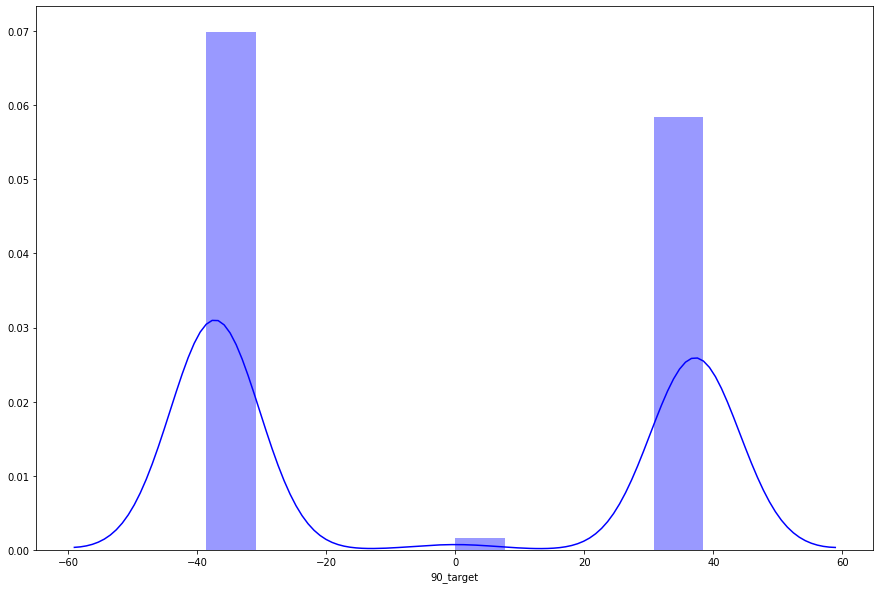

In [20]:
plt.figure(figsize=(15,10))
sns.distplot(df["90_target"], hist=True, color="b")

In [21]:
dfnb=df.copy()

In [24]:
dfnb['90_target']

0       36.997753
1       37.016198
2      -37.024805
3      -37.040483
4      -37.103503
          ...    
6162   -35.867088
6163   -35.868318
6164   -35.894755
6165   -35.930723
6166   -35.915659
Name: 90_target, Length: 6167, dtype: float64

In [27]:
for i in range(len(dfnb["90_target"])):
    if dfnb["90_target"][i]==0:
        dfnb["90_target"][i]=0
    if dfnb["90_target"][i]<0:
        dfnb["90_target"][i]=1
    if dfnb["90_target"][i]>0:
        dfnb["90_target"][i]=2

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
dfnb["90_target"]

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
6162    2.0
6163    2.0
6164    2.0
6165    2.0
6166    2.0
Name: 90_target, Length: 6167, dtype: float64

In [39]:
y=dfnb["90_target"]
X=dfnb.drop(["ind_109","50_target","90_target","20_target","ind_420","ind_422"],axis=1).astype('float64')
X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-44.0,-23.0,-27.0,0.002371,2.0,-49.6,-54.0,1.0,0.498547,0.701906
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-48.0,-16.0,-31.0,0.003074,0.8,-55.6,-60.0,1.0,0.537088,0.690833
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-48.0,-10.0,-30.0,0.003561,2.7,-58.4,-60.0,1.0,0.615169,0.693040
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-51.0,-10.0,-30.0,0.004366,0.9,-61.8,-65.0,1.0,0.661517,0.673418
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-70.0,-24.0,-45.0,0.004198,0.1,-79.8,-86.0,1.0,0.747204,0.700522


In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42, shuffle=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4625, 130), (1542, 130), (4625,), (1542,))

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb_model = mnb.fit(X_train_scaled , y_train)
mnb_model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [46]:
mnb_model.predict(X_test_scaled)[0:10]

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [47]:
mnb_model.predict_proba(X_test_scaled)[0:10]

array([[3.12714381e-03, 9.96872856e-01],
       [1.30632893e-04, 9.99869367e-01],
       [2.03847644e-03, 9.97961524e-01],
       [1.25620911e-03, 9.98743791e-01],
       [1.26372663e-03, 9.98736273e-01],
       [3.74223313e-03, 9.96257767e-01],
       [7.47694479e-04, 9.99252306e-01],
       [1.36857397e-02, 9.86314260e-01],
       [2.26343040e-01, 7.73656960e-01],
       [1.31949667e-02, 9.86805033e-01]])

In [48]:
y_pred = mnb_model.predict(X_test_scaled)

In [49]:
accuracy_score(y_test, y_pred)

0.9824902723735408

# Model Tunning

In [57]:
mnb_params  = {"class_prior": [(0.1, 0.9), (0.2, 0.8), (0.3, 0.7)],
               "alpha": [0.1,0.01,0.02,0.005]}
mnb=MultinomialNB()
mnb_cv = GridSearchCV(mnb, mnb_params, cv=10)
mnb_cv.fit(X_train_scaled, y_train)
print("En iyi Skor:" +str(mnb_cv.best_score_))
print("En İyi Parametreler:" +str(mnb_cv.best_params_))

En iyi Skor:0.9775135135135136
En İyi Parametreler:{'alpha': 0.005, 'class_prior': (0.1, 0.9)}


In [59]:
mnb = MultinomialNB(class_prior= (0.1, 0.9), alpha=0.005)
mnb_model = mnb.fit(X_train_scaled, y_train)
mnb_model

MultinomialNB(alpha=0.005, class_prior=(0.1, 0.9), fit_prior=True)

In [60]:
y_pred = mnb_model.predict(X_test)

In [61]:
accuracy_score(y_test, y_pred)

0.49286640726329445

# GradientBoostingRegressor

In [21]:
y= df["90_target"]
X= df.drop(["20_target","50_target","90_target", "ind_420", "ind_422","ind_109"],axis=1)

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42, shuffle=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4625, 130), (1542, 130), (4625,), (1542,))

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

In [24]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [25]:
from sklearn.metrics import mean_squared_error
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

25.715690904916396

# Model Tunning

In [35]:
gbm_params = {
    "learning_rate":[0.001, 0.01, 0.1],
    "max_depth":[3, 5, 8, 50, 100],
    "n_estimators":[200, 500, 1000],
    "subsample":[1, 0.5, 0.75]
}

In [27]:
gbm = GradientBoostingRegressor()

In [ ]:
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs=-1, verbose=2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 26.1min


In [ ]:
gbm_cv_model.best_params_

In [ ]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,
                                     max_depth =3,
                                     n_estimators = 500,
                                     subsample = 0.5 )
gbm_tuned = gbm_tuned.fit(X_train, y_train)

In [ ]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# KNN

In [20]:
y= df["90_target"]
X= df.drop(["20_target","50_target","90_target", "ind_420", "ind_422"],axis=1)

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle=0)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (4625, 131)
y_train (4625,)
X_test (1542, 131)
y_test (1542,)


In [23]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [24]:
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [25]:
knn_model.n_neighbors

5

In [26]:
knn_model.effective_metric_

'euclidean'

In [27]:
y_pred = knn_model.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

32.58566468602026

In [29]:
RMSE =[]
for k in range(10):
    k=k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train,y_train)
    y_pred=knn_model.predict(X_train)
    rmse=np.sqrt(mean_squared_error(y_train, y_pred))
    RMSE.append(rmse)
    print("k=" , k, "için RMSE değeri:" ,rmse)

k= 1 için RMSE değeri: 0.0
k= 2 için RMSE değeri: 16.520193905800742
k= 3 için RMSE değeri: 20.725345219084115
k= 4 için RMSE değeri: 23.20803291532203
k= 5 için RMSE değeri: 24.969194086647057
k= 6 için RMSE değeri: 26.054241942647774
k= 7 için RMSE değeri: 26.999035084355373
k= 8 için RMSE değeri: 27.914961403228293
k= 9 için RMSE değeri: 28.449848166428648
k= 10 için RMSE değeri: 29.02804297676551


# Model Tunning

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
knn_params= {'n_neighbors':np.arange(1,30,1),
            'weights':['uniform','distance'],
            'metric':["minkowski","euclidean","manhattan"]}

In [32]:
knn= KNeighborsRegressor()

In [33]:
knn_cv_model = GridSearchCV(knn,knn_params, cv=10)

In [34]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [36]:
knn_cv_model.best_params_["n_neighbors"]

2

In [37]:
print("En iyi parametreler:" +str(knn_cv_model.best_params_))

En iyi parametreler:{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}


In [38]:
print("En iyi skor:"+str(knn_cv_model.best_score_))
print("En iyi parametreler:"+str(knn_cv_model.best_params_))

En iyi skor:0.5459506478029407
En iyi parametreler:{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}


In [39]:
knn_model_tuned=KNeighborsRegressor(metric="manhattan",
                                   n_neighbors=2,
                                   weights="distance").fit(X_train,y_train)

In [40]:
y_pred_tuned = knn_model_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_tuned))

25.28021457429001

In [41]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV")

k = 1 için RMSE değeri:  0.0 RMSE_CV
k = 2 için RMSE değeri:  16.520193905800742 RMSE_CV
k = 3 için RMSE değeri:  20.725345219084115 RMSE_CV
k = 4 için RMSE değeri:  23.20803291532203 RMSE_CV
k = 5 için RMSE değeri:  24.969194086647057 RMSE_CV
k = 6 için RMSE değeri:  26.054241942647774 RMSE_CV
k = 7 için RMSE değeri:  26.999035084355373 RMSE_CV
k = 8 için RMSE değeri:  27.914961403228293 RMSE_CV
k = 9 için RMSE değeri:  28.449848166428648 RMSE_CV
k = 10 için RMSE değeri:  29.02804297676551 RMSE_CV


In [42]:
knn_tuned= KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [43]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [44]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

32.78586686545848

# K-MEANS

In [104]:
dfkm=df.copy()
dfkm.drop(["20_target","50_target","90_target", "ind_109","ind_420", "ind_422"],axis=1)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428
0,19,17,100.000000,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-44,-23,-27,0.002371,2.0,-49.6,-54,1.000000,0.498547,0.701906
1,24,19,100.000000,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-48,-16,-31,0.003074,0.8,-55.6,-60,1.000000,0.537088,0.690833
2,30,24,100.000000,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-48,-10,-30,0.003561,2.7,-58.4,-60,1.000000,0.615169,0.693040
3,37,30,100.000000,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-51,-10,-30,0.004366,0.9,-61.8,-65,1.000000,0.661517,0.673418
4,41,37,100.000000,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-70,-24,-45,0.004198,0.1,-79.8,-86,1.000000,0.747204,0.700522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,27,31,57.142857,28.571429,28.571429,60.010531,32.362582,9.70,9.38,13.66,...,-25,7,4,0.004633,14.7,-28.2,-40,0.270270,0.840000,0.600846
6163,22,27,50.000000,21.428571,28.571429,60.209998,32.914628,7.65,8.84,11.79,...,-23,5,5,0.008511,14.3,-28.6,-41,0.000000,0.737470,0.527673
6164,19,22,42.857143,14.285714,28.571429,64.329611,43.550592,8.95,9.06,10.30,...,-30,-6,-3,0.008848,5.7,-37.2,-49,0.769231,0.632107,0.551759
6165,19,19,100.000000,7.142857,92.857143,69.027764,54.130755,13.55,10.36,10.55,...,-40,-17,-14,0.008940,1.4,-48.9,-61,1.000000,0.733010,0.591584


In [105]:
y=df["90_target"]
corr_matrix = dfkm.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.60)]
X= dfkm.drop(dfkm[to_drop], axis=1)
X

,ind_5,ind_8,ind_9,ind_14,ind_18,ind_27,ind_28,ind_40,ind_88,ind_164,...,ind_324,ind_327,ind_330,ind_334,ind_340,ind_344,ind_349,ind_416,20_target,50_target
0,19,100.000000,85.714286,23.80,9.1100,0.000010,66.666667,3,0.000517,-23.189737,...,-0.000062,12.056738,-0.157039,-0.000091,-0.319064,0.00000,0.0,-49.6,15.135802,35.625252
1,24,100.000000,78.571429,11.45,9.2225,-0.000191,66.666667,3,0.000401,-18.315789,...,-0.000062,11.971831,-0.156961,-0.000091,-0.318905,0.00000,0.0,-55.6,15.143348,35.643013
2,30,100.000000,71.428571,8.75,9.3125,-0.000375,66.666667,3,0.000392,-9.289649,...,-0.000062,11.888112,-0.156925,-0.000091,-0.318831,0.00000,0.0,-58.4,15.146870,35.651301
3,37,100.000000,64.285714,7.80,9.4150,-0.000641,66.666667,3,0.000275,-2.066140,...,-0.000062,11.805556,-0.156858,-0.000091,-0.318696,0.00000,0.0,-61.8,15.153283,0.000000
4,41,100.000000,57.142857,14.90,9.8925,-0.000319,66.666667,2,0.001644,-3.589123,...,-0.000062,11.724138,-0.156592,-0.000091,-0.318155,0.00000,0.0,-79.8,-15.179065,-35.727079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,27,57.142857,28.571429,9.70,16.2175,-0.001080,-66.666667,4,0.000000,15.079649,...,-0.000104,14.583333,-0.055711,-0.000110,-0.525396,-0.00050,0.0,-28.2,14.673247,-34.536532
6163,22,50.000000,21.428571,7.65,16.1175,-0.001114,-66.666667,4,0.000000,10.386404,...,-0.000104,14.285714,-0.055709,-0.000110,-0.525378,-0.00050,0.0,-28.6,14.673750,-34.537716
6164,19,42.857143,14.285714,8.95,16.3125,-0.001265,66.666667,4,0.000000,0.515614,...,-0.000104,14.000000,-0.055668,-0.000110,-0.524991,-0.00050,0.0,-37.2,-14.684566,-34.563173
6165,19,100.000000,7.142857,13.55,16.4200,-0.000942,66.666667,4,0.000636,-7.381842,...,-0.000104,13.725490,-0.055612,-0.000110,-0.524465,-0.00032,0.0,-48.9,-14.699280,-34.597806


In [106]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA()

In [107]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42, shuffle=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4625, 33), (1542, 33), (4625,), (1542,))

In [108]:
#datalarımın aynı scalede düzlemde oluşu önemli pca için
x_reduced_train = pca.fit_transform(scale(X_train))
x_reduced_train[0:1,:]

array([[-2.18796161,  0.77960145,  0.9493808 ,  2.13096962, -0.64475243,
        -0.60970148,  0.28616391,  0.7251984 ,  0.21620774,  1.22827233,
        -0.56847864, -0.65985114, -1.70868469, -0.10266886,  0.72490279,
         0.24364204,  0.87575592, -0.4645515 ,  1.08402572,  0.22528106,
        -1.27253636, -0.40697477, -0.2619433 ,  1.08147272, -0.26294942,
        -0.7464852 , -0.29547399,  1.30059986,  0.42761714, -1.03333493,
         0.49593046,  0.29721763, -0.07918674]])

([<matplotlib.axis.XTick at 0x26ff9a86108>,
 <a list of 33 Text xticklabel objects>)

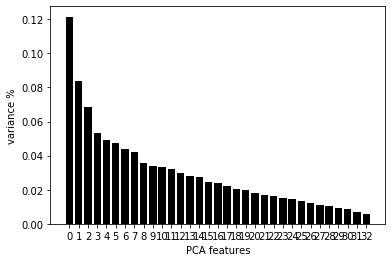

In [109]:
import matplotlib.pyplot as plt
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [110]:
def pca_fon(X, threshold):
    pca = PCA()
    X_pca = pca.fit_transform(scale(X))
    arr = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)
    num_var = sum((arr < threshold*100)) + 1 
    print('pca sonrası değişken sayısı: ',num_var)
    X_pcad = pd.DataFrame(X_pca[:,0:num_var], index = X.index)
    return X_pcad

In [111]:
#%70 için kaç değişken kullanmalıyım?
print(pca_fon(X_train, 0.70))

pca sonrası değişken sayısı:  14
             0         1         2         3         4         5         6  \
5059 -2.187962  0.779601  0.949381  2.130970 -0.644752 -0.609701  0.286164   
1730  0.125318 -0.096851 -0.791471 -0.143880  0.741391  0.697694  0.149233   
4119 -0.304569 -1.965015  1.360255  0.636763  0.727102  0.927052  0.103578   
61   -1.280553  0.855980 -0.284507 -2.315280 -0.508506  1.183134 -0.262674   
1665 -0.134283  0.409124  0.089734  0.181774  0.466196  1.181740 -0.460549   
...        ...       ...       ...       ...       ...       ...       ...   
3772 -0.816067 -0.617657  0.159405 -1.158004 -0.089955  1.314975 -0.245744   
5191 -0.682975  0.944790 -0.214465  1.282586  1.877289 -2.042415 -0.461919   
5226  1.310811 -1.248106  0.150915  1.247624  0.347612  0.408624  0.602175   
5390 -0.754999  0.320733  0.010200  0.098517  1.888644 -0.386762  0.252856   
860   4.590580  2.827982 -0.996557  4.117165 -1.486765  3.161433 -1.260594   

             7         8      

In [112]:
pca = PCA(n_components = 14)
X_reduced_train = pca.fit_transform(scale(X_train))
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)

In [115]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [116]:
k_fit = kmeans.fit(X_reduced_train)
k_fit.n_clusters

4

In [117]:
kumeler = k_fit.labels_
k_fit.cluster_centers_

array([[-1.92558016, -0.80296393,  1.50613856,  0.89371564, -0.03195416,
        -0.10930226,  0.21350129,  0.1017791 , -0.32390606,  0.53605365,
        -0.23350595, -0.06382261,  0.47671301, -0.30817143],
       [ 3.75940759,  3.12640849,  2.6096689 , -0.30463397, -0.26600882,
         0.13367113, -0.19996106,  0.26531651, -0.17654095, -0.43805077,
         0.06872692, -0.38029241,  0.21418309, -0.44937985],
       [-1.0843079 ,  0.7174661 , -0.56197634, -0.40100481,  0.27761068,
         0.09848078,  0.01031143,  0.12698444,  0.28140708, -0.28132547,
         0.06905288, -0.09823231, -0.25235636,  0.09283888],
       [ 1.25200859, -0.76789633, -0.62863597, -0.01266756, -0.18813175,
        -0.05792548, -0.07650536, -0.20319761, -0.06955877,  0.06998344,
         0.03674908,  0.17860143, -0.03372262,  0.13455227]])

In [118]:
k_fit.labels_

array([0, 2, 0, ..., 3, 2, 1])

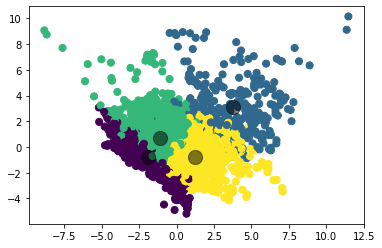

In [123]:
plt.scatter(X_reduced_train[:,0], X_reduced_train[:,1], c=kumeler, s=50, cmap="viridis")
merkezler = k_fit.cluster_centers_
plt.scatter(merkezler[:,0], merkezler[:,1], c="black", s=200, alpha=0.5)
plt.show()

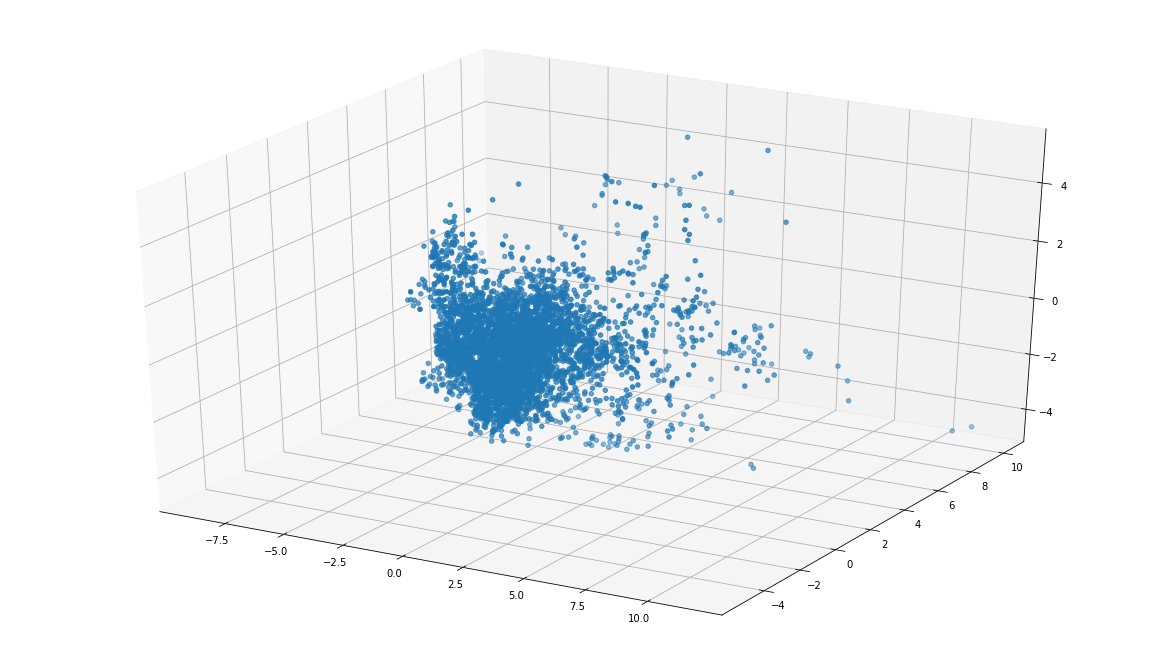

In [125]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_reduced_train[:, 0], X_reduced_train[:, 1], X_reduced_train[:, 3])

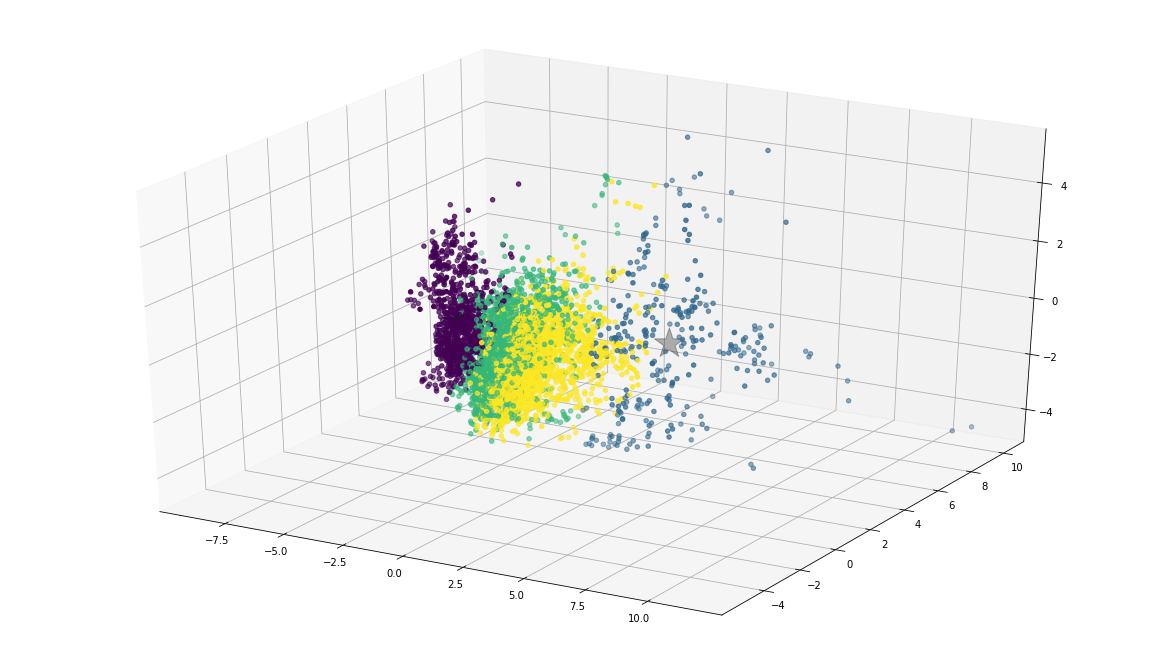

In [126]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_reduced_train[:, 0], X_reduced_train[:, 1], X_reduced_train[:, 3], c=kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 3], 
           marker='*', 
           c='#080808', 
           s=1000);

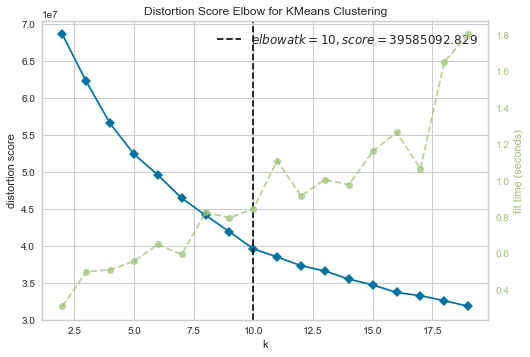

In [131]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,20))
visualizer.fit(X_reduced_train)
visualizer.poof()

In [133]:
kmeans=KMeans(n_clusters =10)
k_fit=kmeans.fit(X_reduced_train)
kumeler = k_fit.labels_

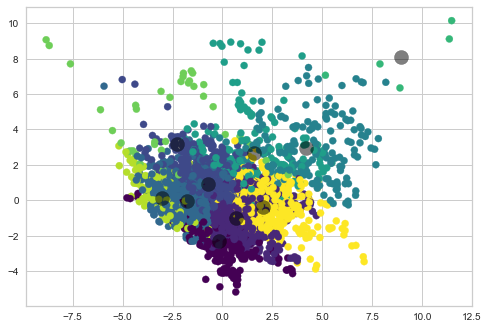

In [135]:
plt.scatter(X_reduced_train[:,0], X_reduced_train[:,1], c=kumeler, s=50, cmap="viridis")
merkezler = k_fit.cluster_centers_
plt.scatter(merkezler[:,0], merkezler[:,1], c="black", s=200, alpha=0.5)
plt.show()

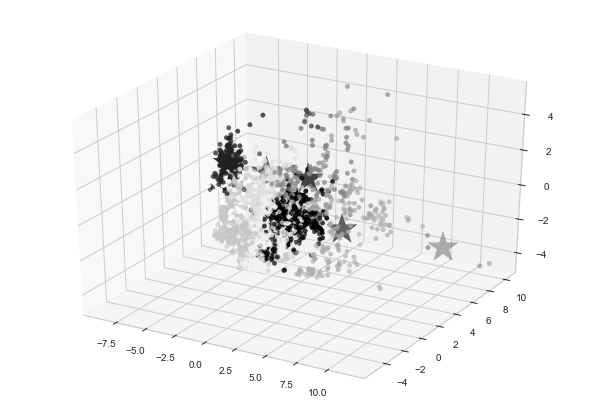

In [137]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_reduced_train[:, 0], X_reduced_train[:, 1], X_reduced_train[:, 3], c=kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 3], 
           marker='*', 
           c='#080808', 
           s=1000);